# Comparison between NovaSeq6K and Element Sequencing

In [8]:
import warnings 
warnings.filterwarnings("ignore",message="The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator")

import matplotlib as mpl
import scanpy as sc 
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
import os
from plotnine import *
np.random.seed(13)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

# Ignore cmap/matplotlib color warnings 
warnings.filterwarnings("ignore", message="No data for colormapping provided")
warnings.filterwarnings("ignore", message="The get_cmap function was deprecated in Matplotlib")

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 400
mpl.rcParams['figure.frameon'] = False


scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.26.0 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.2 statsmodels==0.14.0 pynndescent==0.5.10


In [9]:
dir_yascp = '/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/yascp_analysis/2023_08_22-sequencing_pilots/'

In [10]:
adata_6k = sc.read_h5ad(os.path.join(dir_yascp, 'ti_novaseq6k_v7/results/celltype/adata.h5ad'))
element = sc.read_h5ad(os.path.join(dir_yascp, 'ti_Element/results/celltype/adata.h5ad'))


In [11]:
adata = adata_6k.concatenate(element, batch_key = 'tech', batch_categories = ['NovaSeq6K', 'Element'])
adata.obs.head()


/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html


convoluted_samplename  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...      5892STDY13214670   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...      5892STDY13214670   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...      5892STDY13214670   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...      5892STDY13214670   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...      5892STDY13214670   

                                                   donor_id prob_max  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...    donor      nan   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...    donor      nan   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...    donor      nan   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...    donor      nan   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...    donor      nan   

                                                    prob_doublet n_vars  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...      0.110998    nan   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...      0.097816    nan   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...      0.102718    nan   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...      0.100211    nan   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...      0.091236    nan   

                                                   best_singlet best_doublet  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...          nan          nan   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...          nan          nan   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...          nan          nan   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...          nan          nan   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...          nan          nan   

                                                              experiment_id  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...  5892STDY13214670__donor   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...  5892STDY13214670__donor   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...  5892STDY13214670__donor   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...  5892STDY13214670__donor   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...  5892STDY13214670__donor   

                                                    n_cells  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...     5715   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...     5715   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...     5715   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...     5715   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...     5715   

                                                    n_genes_by_counts  ...  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...              13179  ...   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...              12932  ...   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...              11578  ...   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...              12238  ...   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...               4362  ...   

                                                    Keras:probability__T_cell_CD4_naive  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...                         1.572510e-09   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...                         5.566962e-14   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...                         1.966671e-12   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...                         1.583236e-10   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...                         4.466880e-20   

                                                    Keras:probability__T_cell_CD4plus_PASKplus_CCR7plus  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...                                       6.459736e-10     
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...                                       1.512068e-14     
GCTACAATCAAACGAA-1-5892STDY13214670__d

In [12]:
del adata_6k, element

In [13]:
# Create the mapping DataFrame
mapping_df = pd.DataFrame({
    'convoluted_samplename': [
        '5892STDY13214670', 'OTARscRNA13214574', 'OTARscRNA13214576',
        'scrnacdb13214766', 'scrnacdb13214767'
    ],
    'disease_status': [
        'cd', 'healthy', 'healthy', 'cd', 'cd'
    ],
    'biopsy_type': [
        'ti', 'ti', 'ti', 'blood', 'blood'
    ]
})

# Convert columns to string type in mapping_df
mapping_df = mapping_df.astype(str)

# Set 'convoluted_samplename' as the index of mapping_df
mapping_df.set_index('convoluted_samplename', inplace=True)

# Drop 'disease_status' and 'biopsy_type' if they already exist in 'adata.obs'
if 'disease_status' in adata.obs.columns:
    adata.obs.drop('disease_status', axis=1, inplace=True)
if 'biopsy_type' in adata.obs.columns:
    adata.obs.drop('biopsy_type', axis=1, inplace=True)

# Merge the mapping DataFrame into the adata.obs DataFrame using indices
adata.obs = adata.obs.merge(mapping_df, left_index=True, right_index=True, how='left')

# Ensure that the merged columns are of string type
adata.obs[['biopsy_type', 'disease_status']] = adata.obs[['biopsy_type', 'disease_status']].astype(str)

# The 'adata' object's .obs attribute is now updated with the correct 'disease_status' and 'biopsy_type' without duplicates.
# Display the first few rows of the updated DataFrame.
adata.obs.head()


convoluted_samplename  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...      5892STDY13214670   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...      5892STDY13214670   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...      5892STDY13214670   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...      5892STDY13214670   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...      5892STDY13214670   

                                                   donor_id prob_max  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...    donor      nan   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...    donor      nan   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...    donor      nan   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...    donor      nan   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...    donor      nan   

                                                    prob_doublet n_vars  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...      0.110998    nan   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...      0.097816    nan   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...      0.102718    nan   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...      0.100211    nan   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...      0.091236    nan   

                                                   best_singlet best_doublet  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...          nan          nan   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...          nan          nan   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...          nan          nan   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...          nan          nan   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...          nan          nan   

                                                              experiment_id  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...  5892STDY13214670__donor   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...  5892STDY13214670__donor   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...  5892STDY13214670__donor   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...  5892STDY13214670__donor   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...  5892STDY13214670__donor   

                                                    n_cells  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...     5715   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...     5715   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...     5715   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...     5715   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...     5715   

                                                    n_genes_by_counts  ...  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...              13179  ...   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...              12932  ...   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...              11578  ...   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...              12238  ...   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...               4362  ...   

                                                    Keras:probability__Stem_cell_LGR5plus  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...                           2.131080e-05   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...                           6.906195e-09   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...                           4.834815e-15   
GCAACATCAACACACT-1-5892STDY13214670__donor-Nova...                           1.276859e-08   
AAGCGAGAGGGAGGCA-1-5892STDY13214670__donor-Nova...                           9.565476e-21   

                                                    Keras:probability__B_cell_memory_2  \
TTCCGGTAGTTGGCGA-1-5892STDY13214670__donor-Nova...                        2.496058e-09   
TCATCATGTTCGGTCG-1-5892STDY13214670__donor-Nova...                        1.204423e-13   
GCTACAATCAAACGAA-1-5892STDY13214670__donor-Nova...                        2.0

In [14]:
# # Load your AnnData object (if you haven't already)
# # Group by "convoluted_samplename" and fill NaNs for "disease_status" and "biopsy_type"
# adata.obs['disease_status'] = adata.obs.groupby('convoluted_samplename')['disease_status'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
# adata.obs['biopsy_type'] = adata.obs.groupby('convoluted_samplename')['biopsy_type'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [15]:
adata.obs[['convoluted_samplename', 'disease_status', 'biopsy_type', 'tech']].drop_duplicates(ignore_index = True)

convoluted_samplename disease_status biopsy_type       tech
0      5892STDY13214670            nan         nan  NovaSeq6K
1     OTARscRNA13214574            nan         nan  NovaSeq6K
2     OTARscRNA13214576            nan         nan  NovaSeq6K
3      scrnacdb13214766            nan         nan  NovaSeq6K
4      scrnacdb13214767            nan         nan  NovaSeq6K
5      5892STDY13214670            nan         nan    Element
6     OTARscRNA13214574            nan         nan    Element
7     OTARscRNA13214576            nan         nan    Element
8      scrnacdb13214766            nan         nan    Element
9      scrnacdb13214767            nan         nan    Element

## Doublets 

In [16]:
metadata = adata.obs[['convoluted_samplename', 'disease_status', 'biopsy_type', 'tech']].drop_duplicates(ignore_index = True)
list_dfs = []
for i,row in metadata.iterrows():
    if(row['tech'] == 'NovaSeq6K'):
        tech = 'novaseq6000'
    else:
        tech = 'Element'
    df = pd.read_csv(os.path.join(dir_yascp, 'ti_' + tech, 'results/multiplet.method=scrublet', row['convoluted_samplename'] + 'scrublet.tsv.gz'),
            sep = '\t')
    df['convoluted_samplename'] = row['convoluted_samplename']
    df['disease_status'] = row['disease_status']
    df['biopsy_type'] = row['biopsy_type']
    df['tech'] = row['tech']
    list_dfs.append(df)
df = pd.concat(list_dfs)

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/py

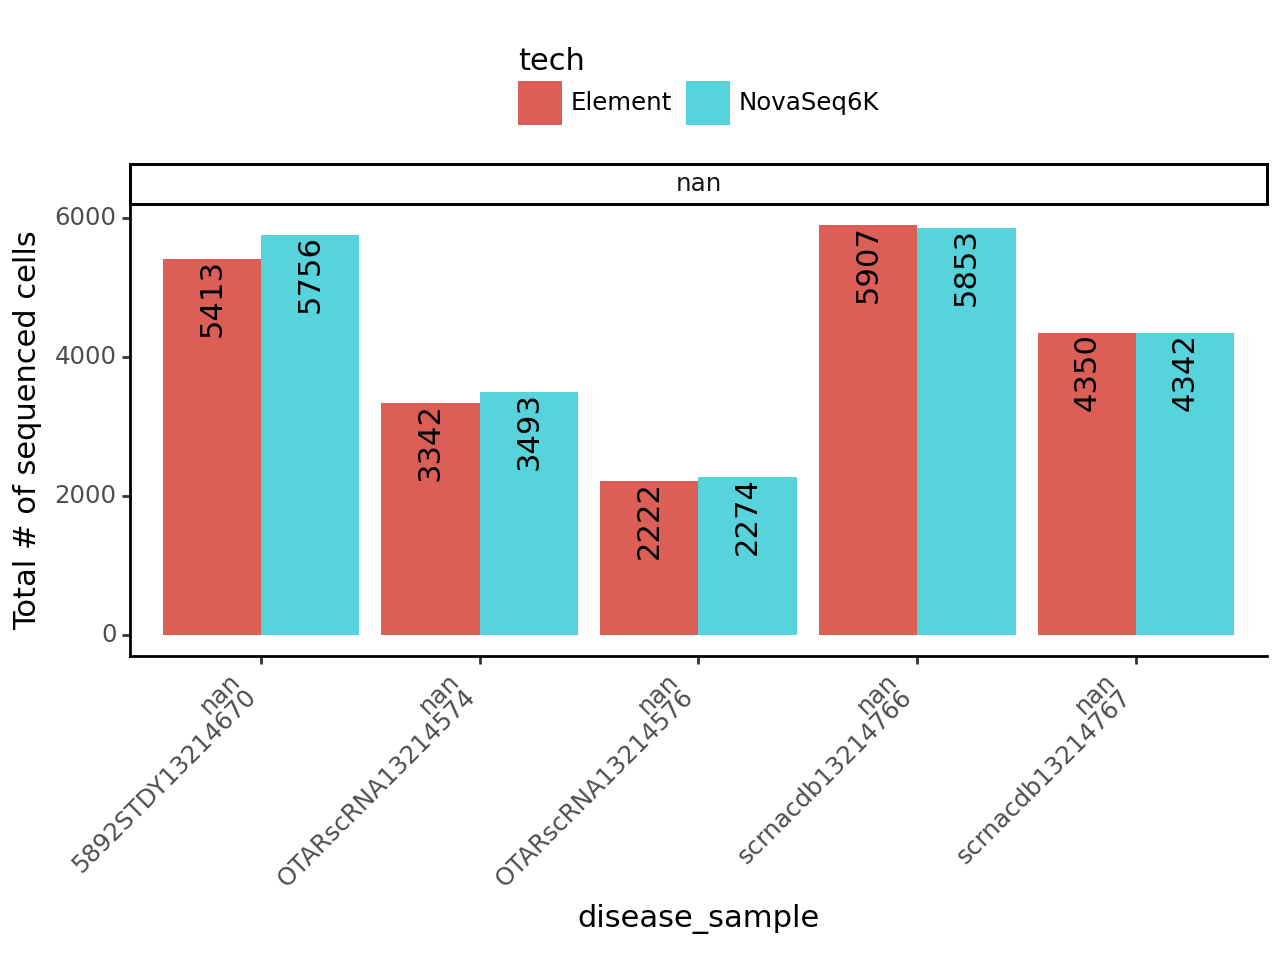

<Figure Size: (640 x 480)>

In [17]:
df.loc[:,'disease_sample'] = df.disease_status + '\n' + df.convoluted_samplename
(
    ggplot(df, aes(x = 'disease_sample', fill = 'tech', group = 'tech')) +
    geom_bar(position = position_dodge)+
    geom_text(aes(label = after_stat('count')), stat = 'count',  
              position = position_dodge(width=0.9), va = 'top',
              angle = 90) + 
    facet_grid('~ biopsy_type', scales = 'free_x') +
    theme_classic() +
    labs(y = 'Total # of sequenced cells') +
    theme(axis_text_x = element_text(angle = 45, hjust = 1), legend_position = 'top')
)

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/py

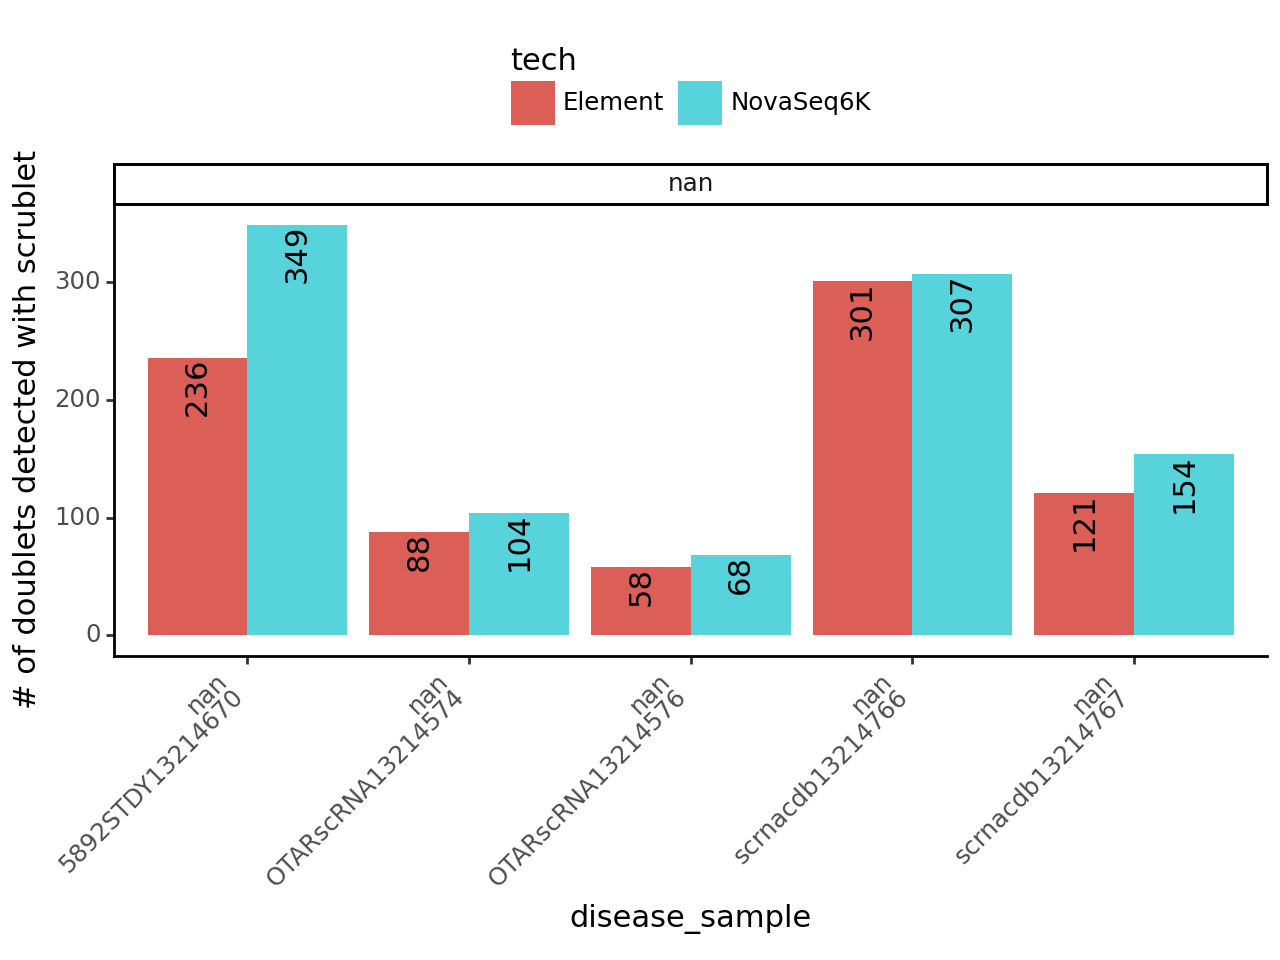

<Figure Size: (640 x 480)>

In [18]:
(
    ggplot(df[df.scrublet__predicted_multiplet], aes(x = 'disease_sample', fill = 'tech', group = 'tech')) +
    geom_bar(position = position_dodge)+
    geom_text(aes(label = after_stat('count')), stat = 'count',  
              position = position_dodge(width=0.9), va = 'top',
              angle = 90) + 
    facet_grid('~ biopsy_type', scales = 'free_x') +
    theme_classic() +
    labs(y = '# of doublets detected with scrublet') +
    theme(axis_text_x = element_text(angle = 45, hjust = 1), legend_position = 'top')
)

## Other QC metrics

In [19]:
qc_covs = ['total_counts', 'log1p_total_counts', 'n_genes_by_counts','pct_counts_gene_group__mito_transcript', 
            'pct_counts_gene_group__ribo_protein']
adata.obs.loc[:,'disease_sample'] = adata.obs.disease_status.astype(str) + '\n' + adata.obs.convoluted_samplename.astype(str)

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/p

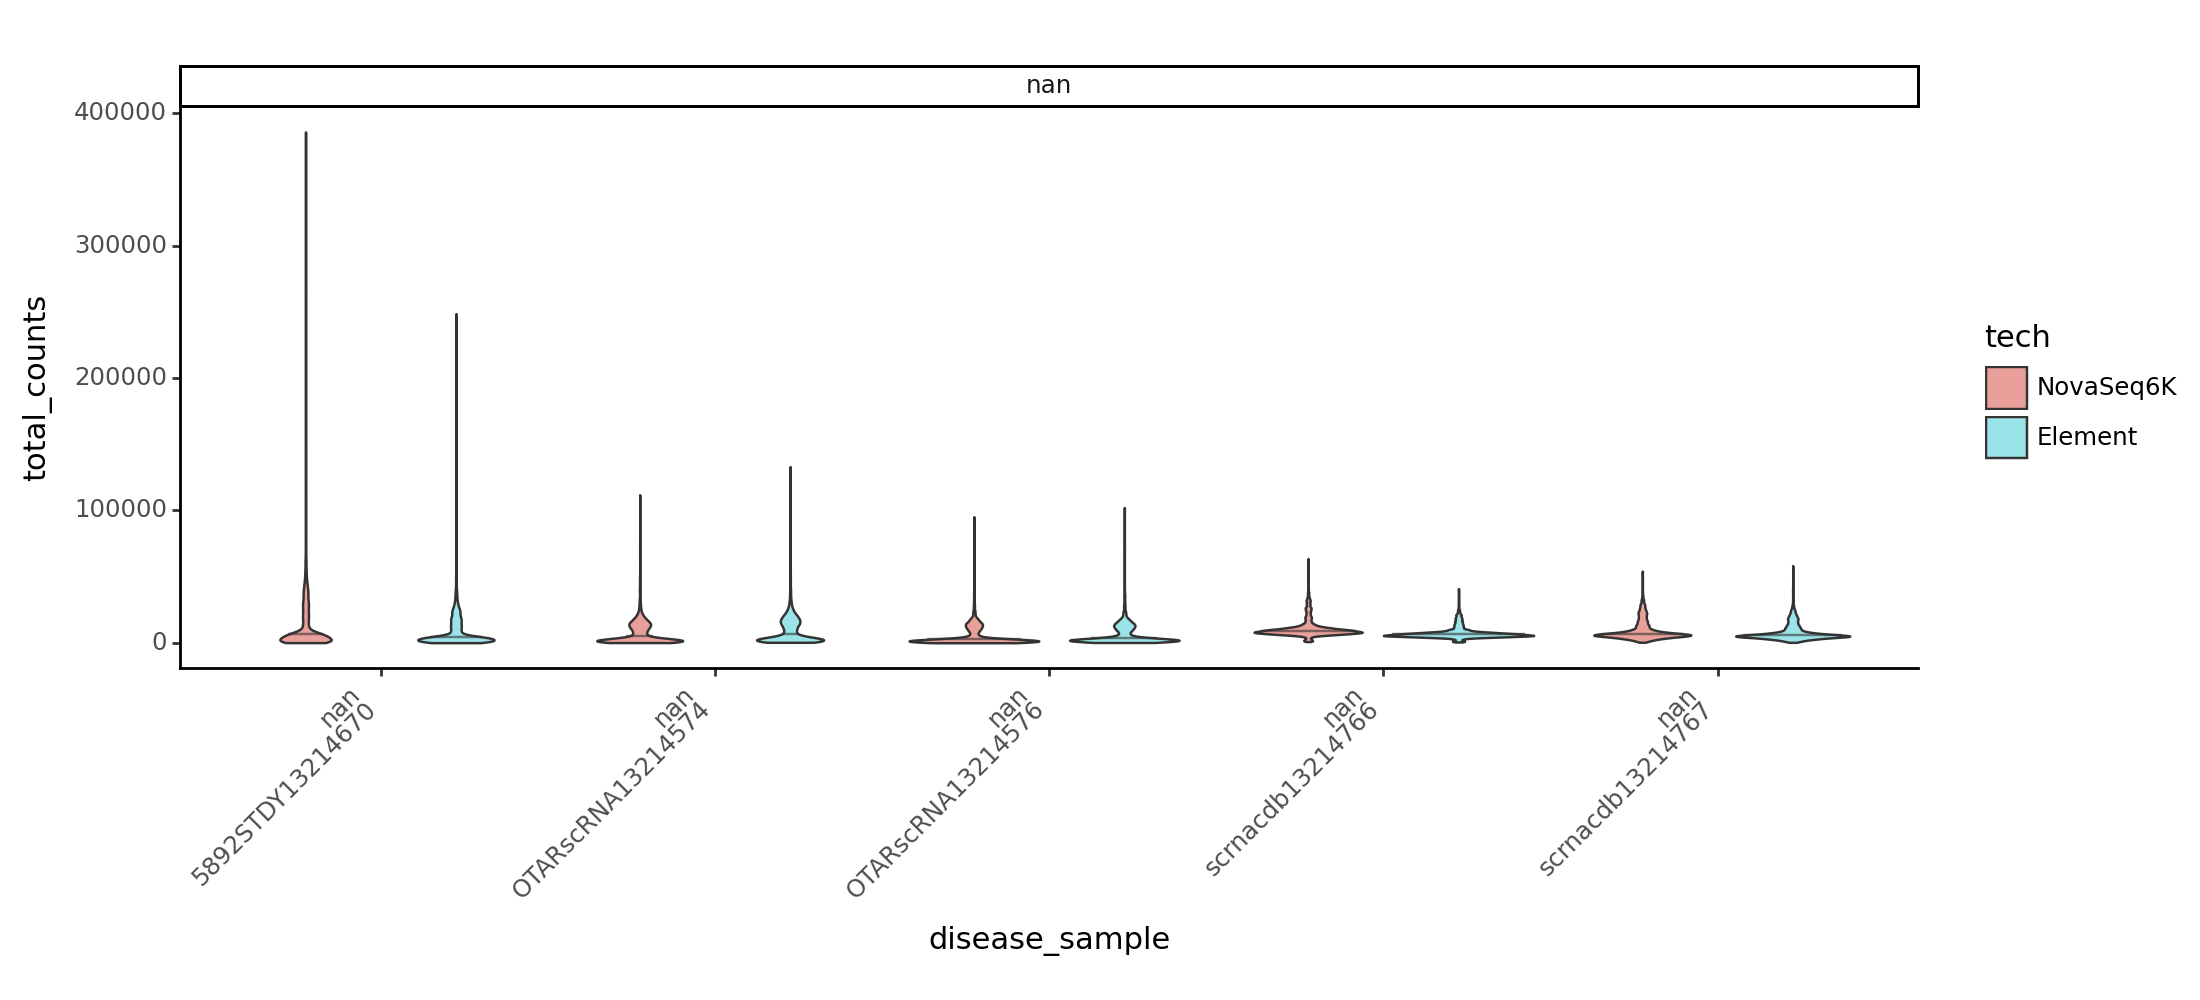

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/p

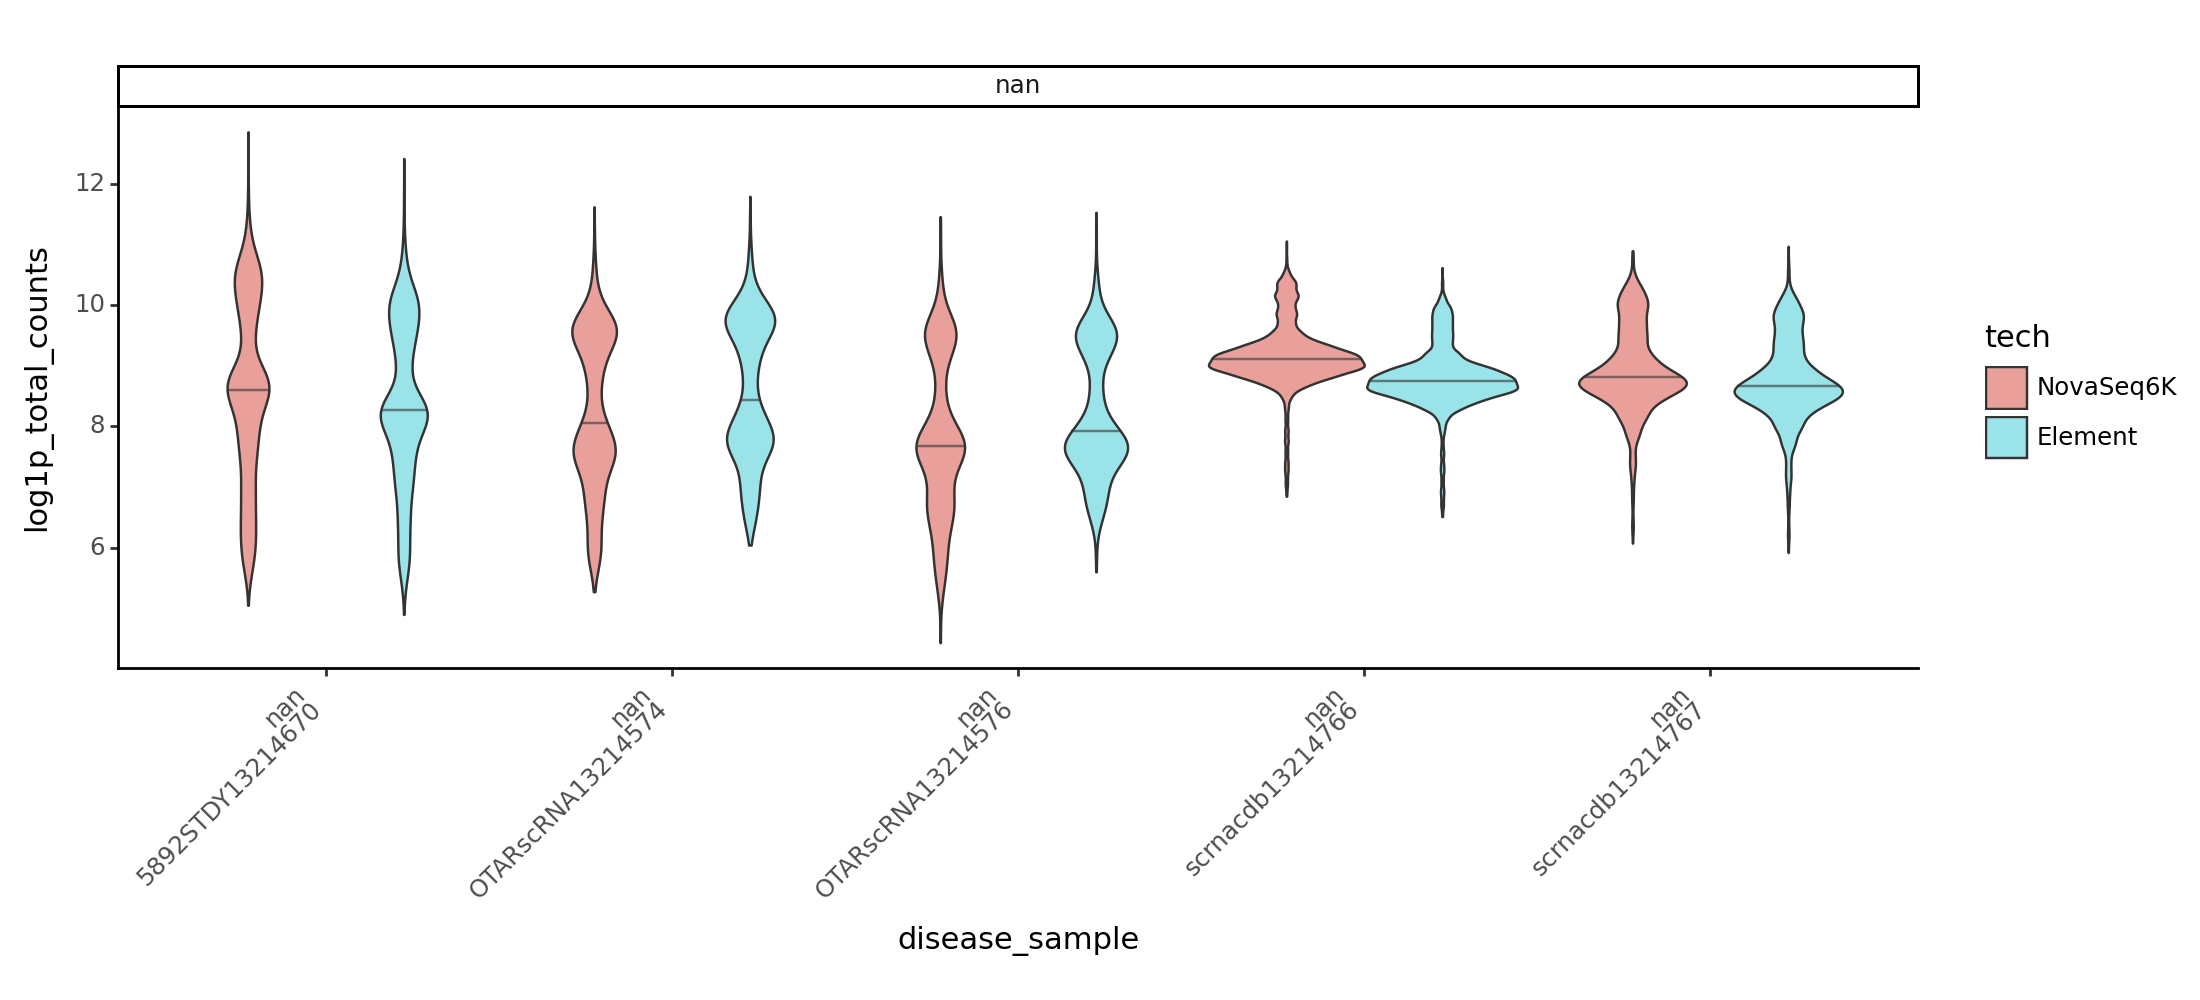

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/p

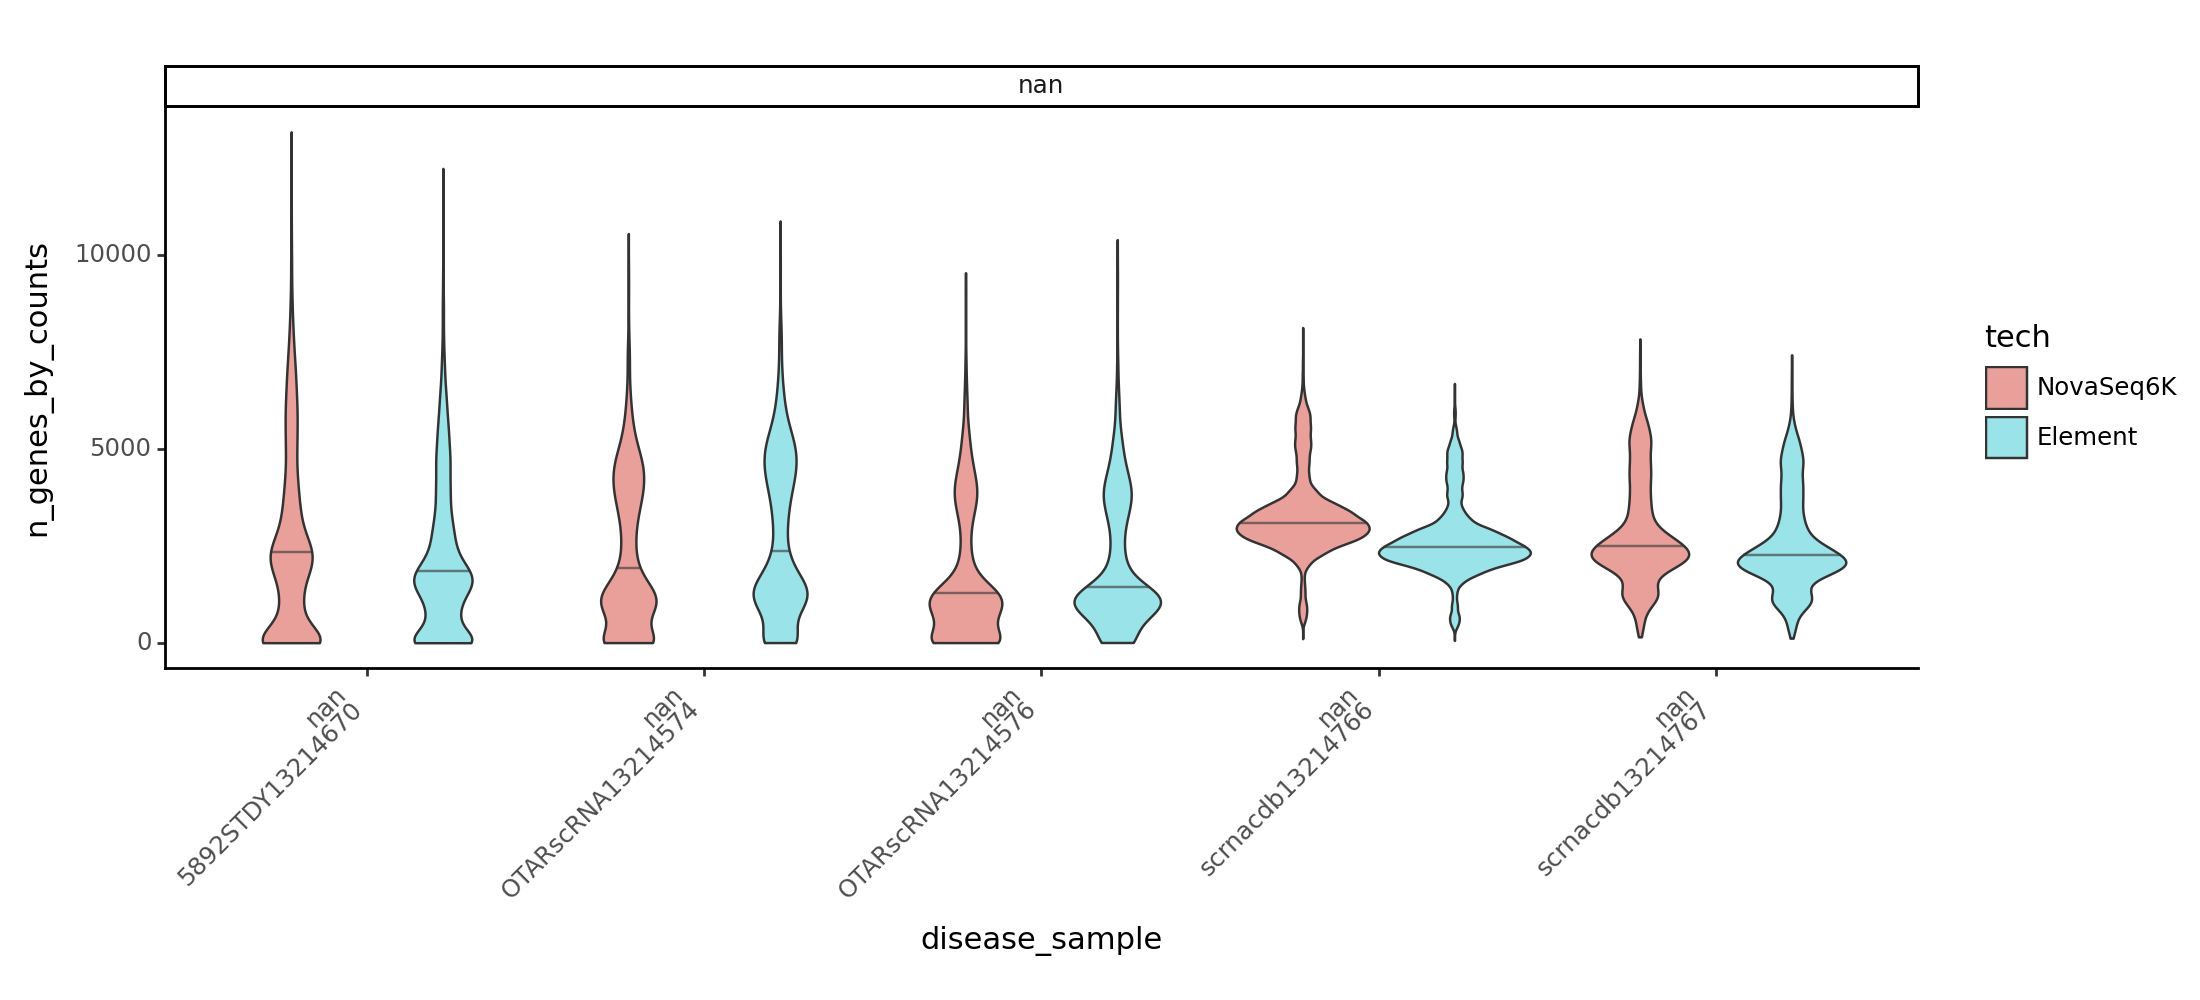

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/p

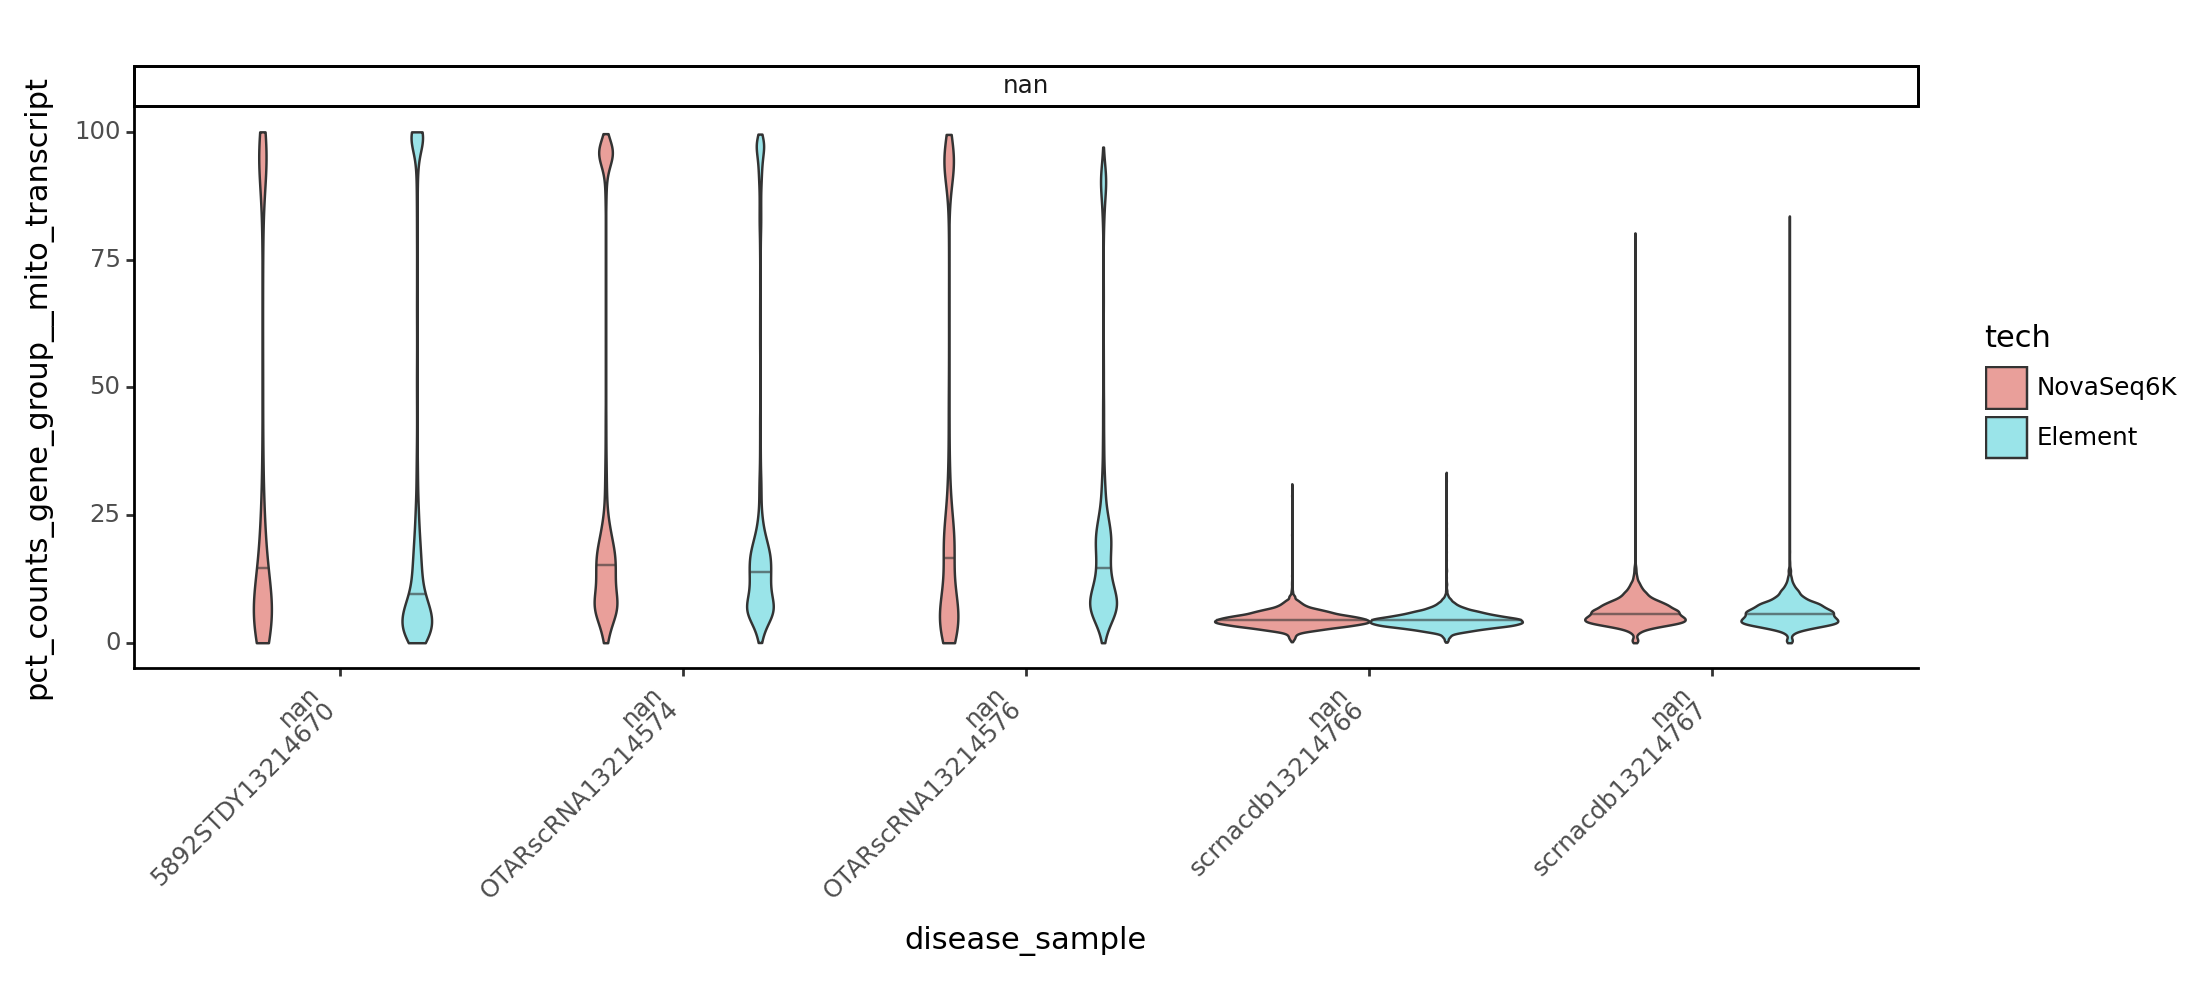

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/p

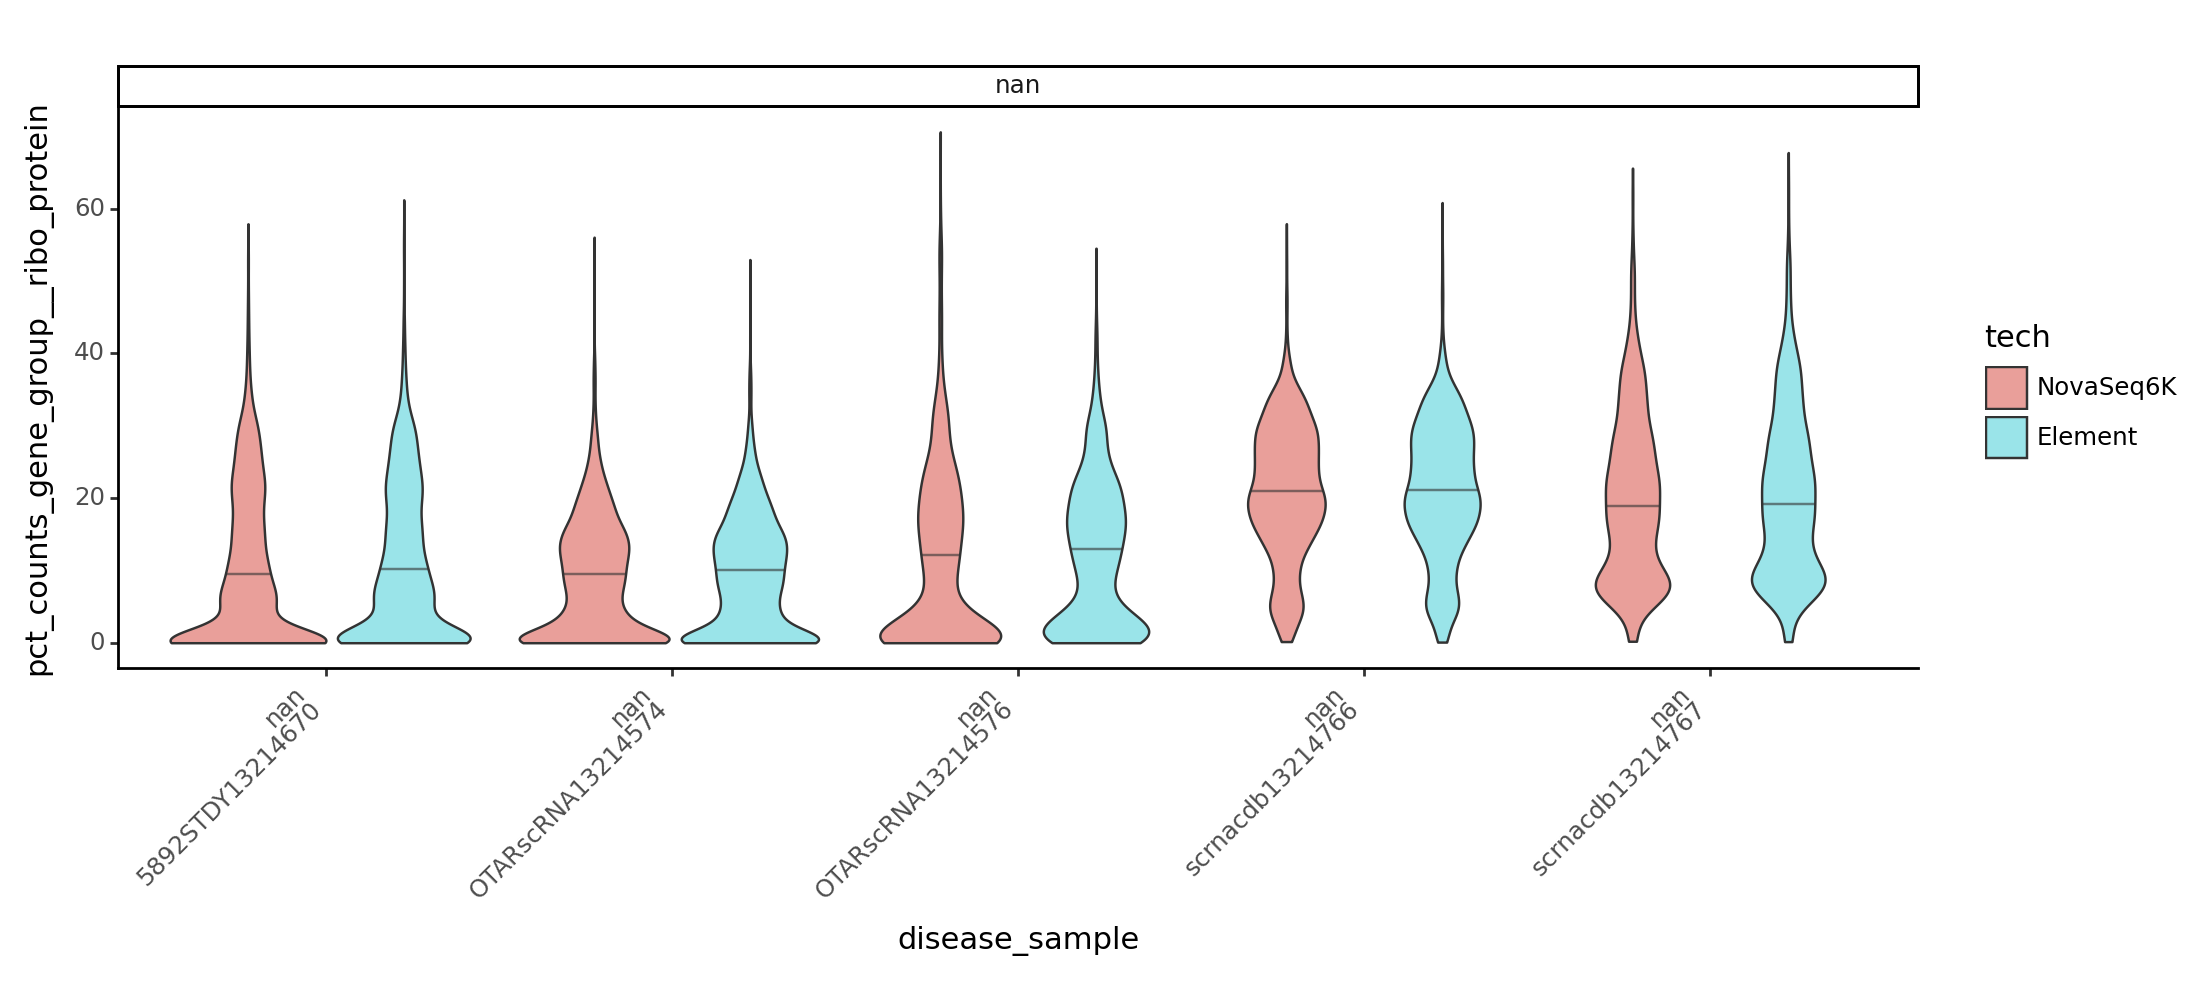

In [20]:
for cov in qc_covs:
    print((
        ggplot(adata.obs, aes(x = 'disease_sample', y = cov, fill = 'tech')) +
        geom_violin(alpha = 0.6, draw_quantiles = 0.5) +
        theme_classic() +
        facet_wrap('~ biopsy_type', scales = 'free') +
        theme(figure_size=(11,5), axis_text_x=element_text(angle = 45, hjust = 1))
    ))

In [26]:
adata.obs.loc[:, 'tissue_disease_sample'] = adata.obs.biopsy_type.astype('str') + ' - ' +  adata.obs.disease_status.astype('str') + '\n' + adata.obs.convoluted_samplename.astype('str') 
adata.obs.loc[:, 'cellID'] = adata.obs_names.str.replace('(-Element|-NovaSeq6K)', '', regex=True).copy()
df = adata.obs[qc_covs + ['tissue_disease_sample', 'tech', 'cellID']].pivot(index = ['cellID', 'tissue_disease_sample'], columns = 'tech')
df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]
df = df.reset_index()


/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

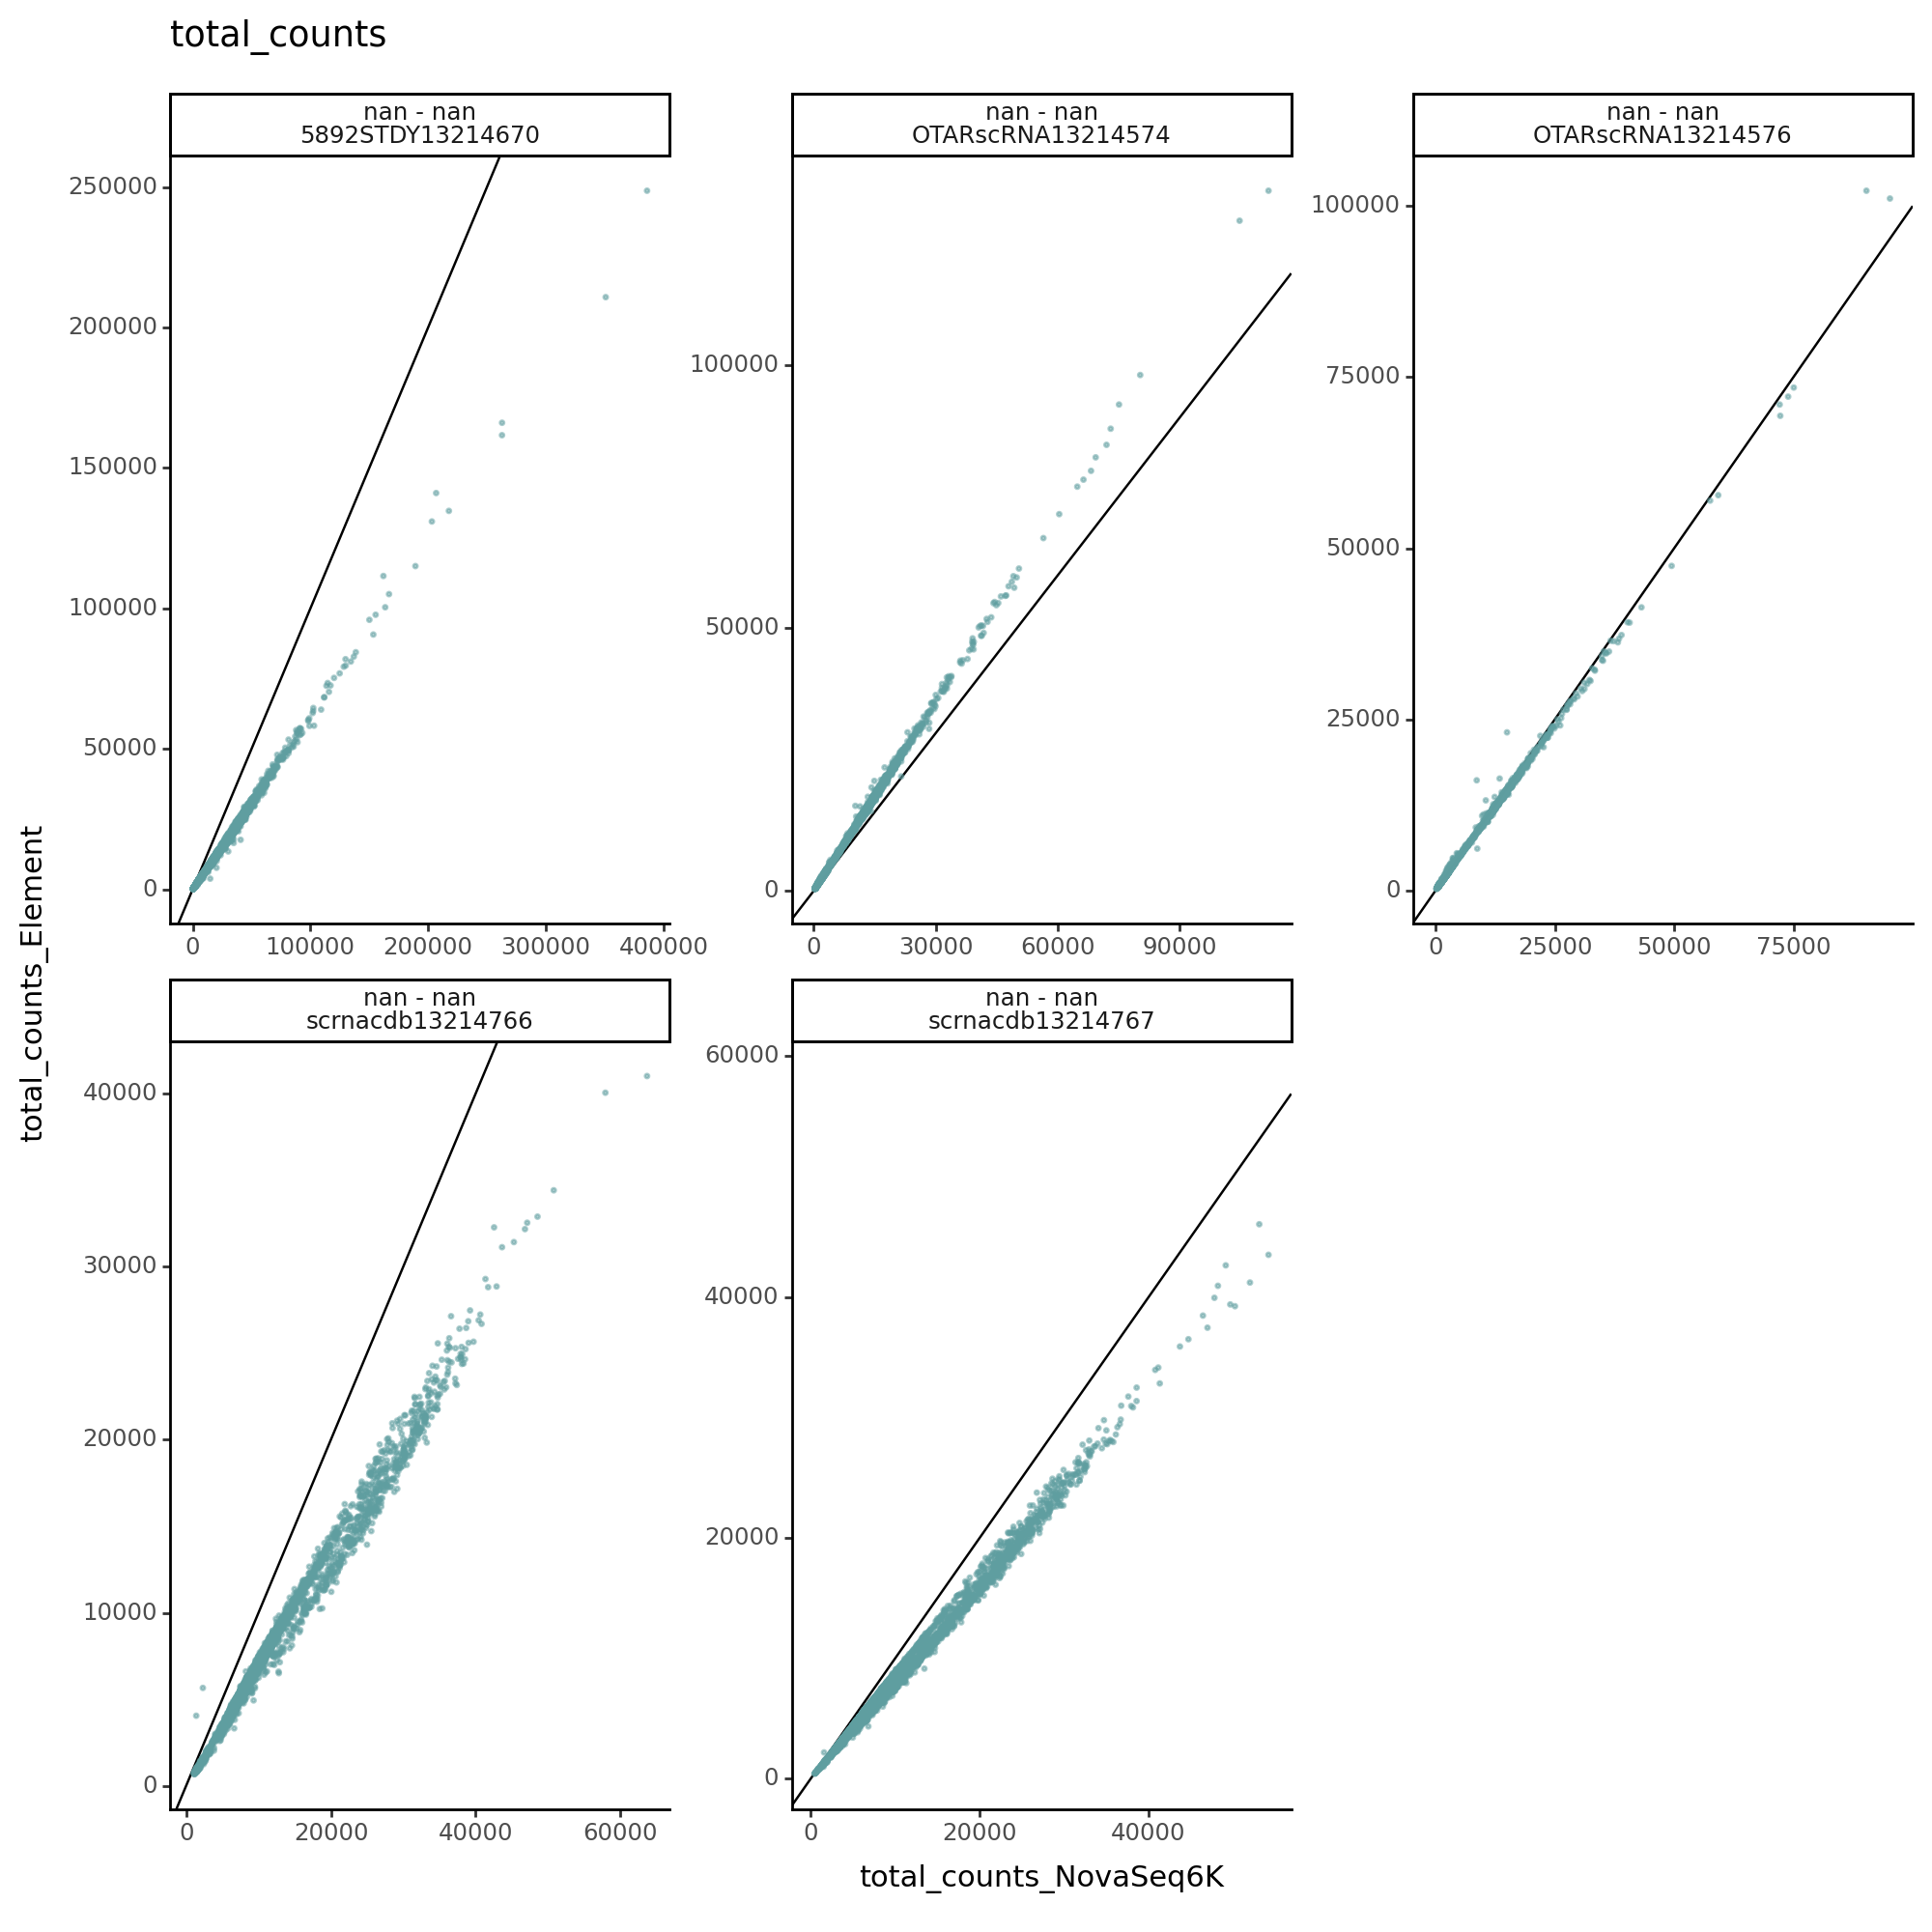

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

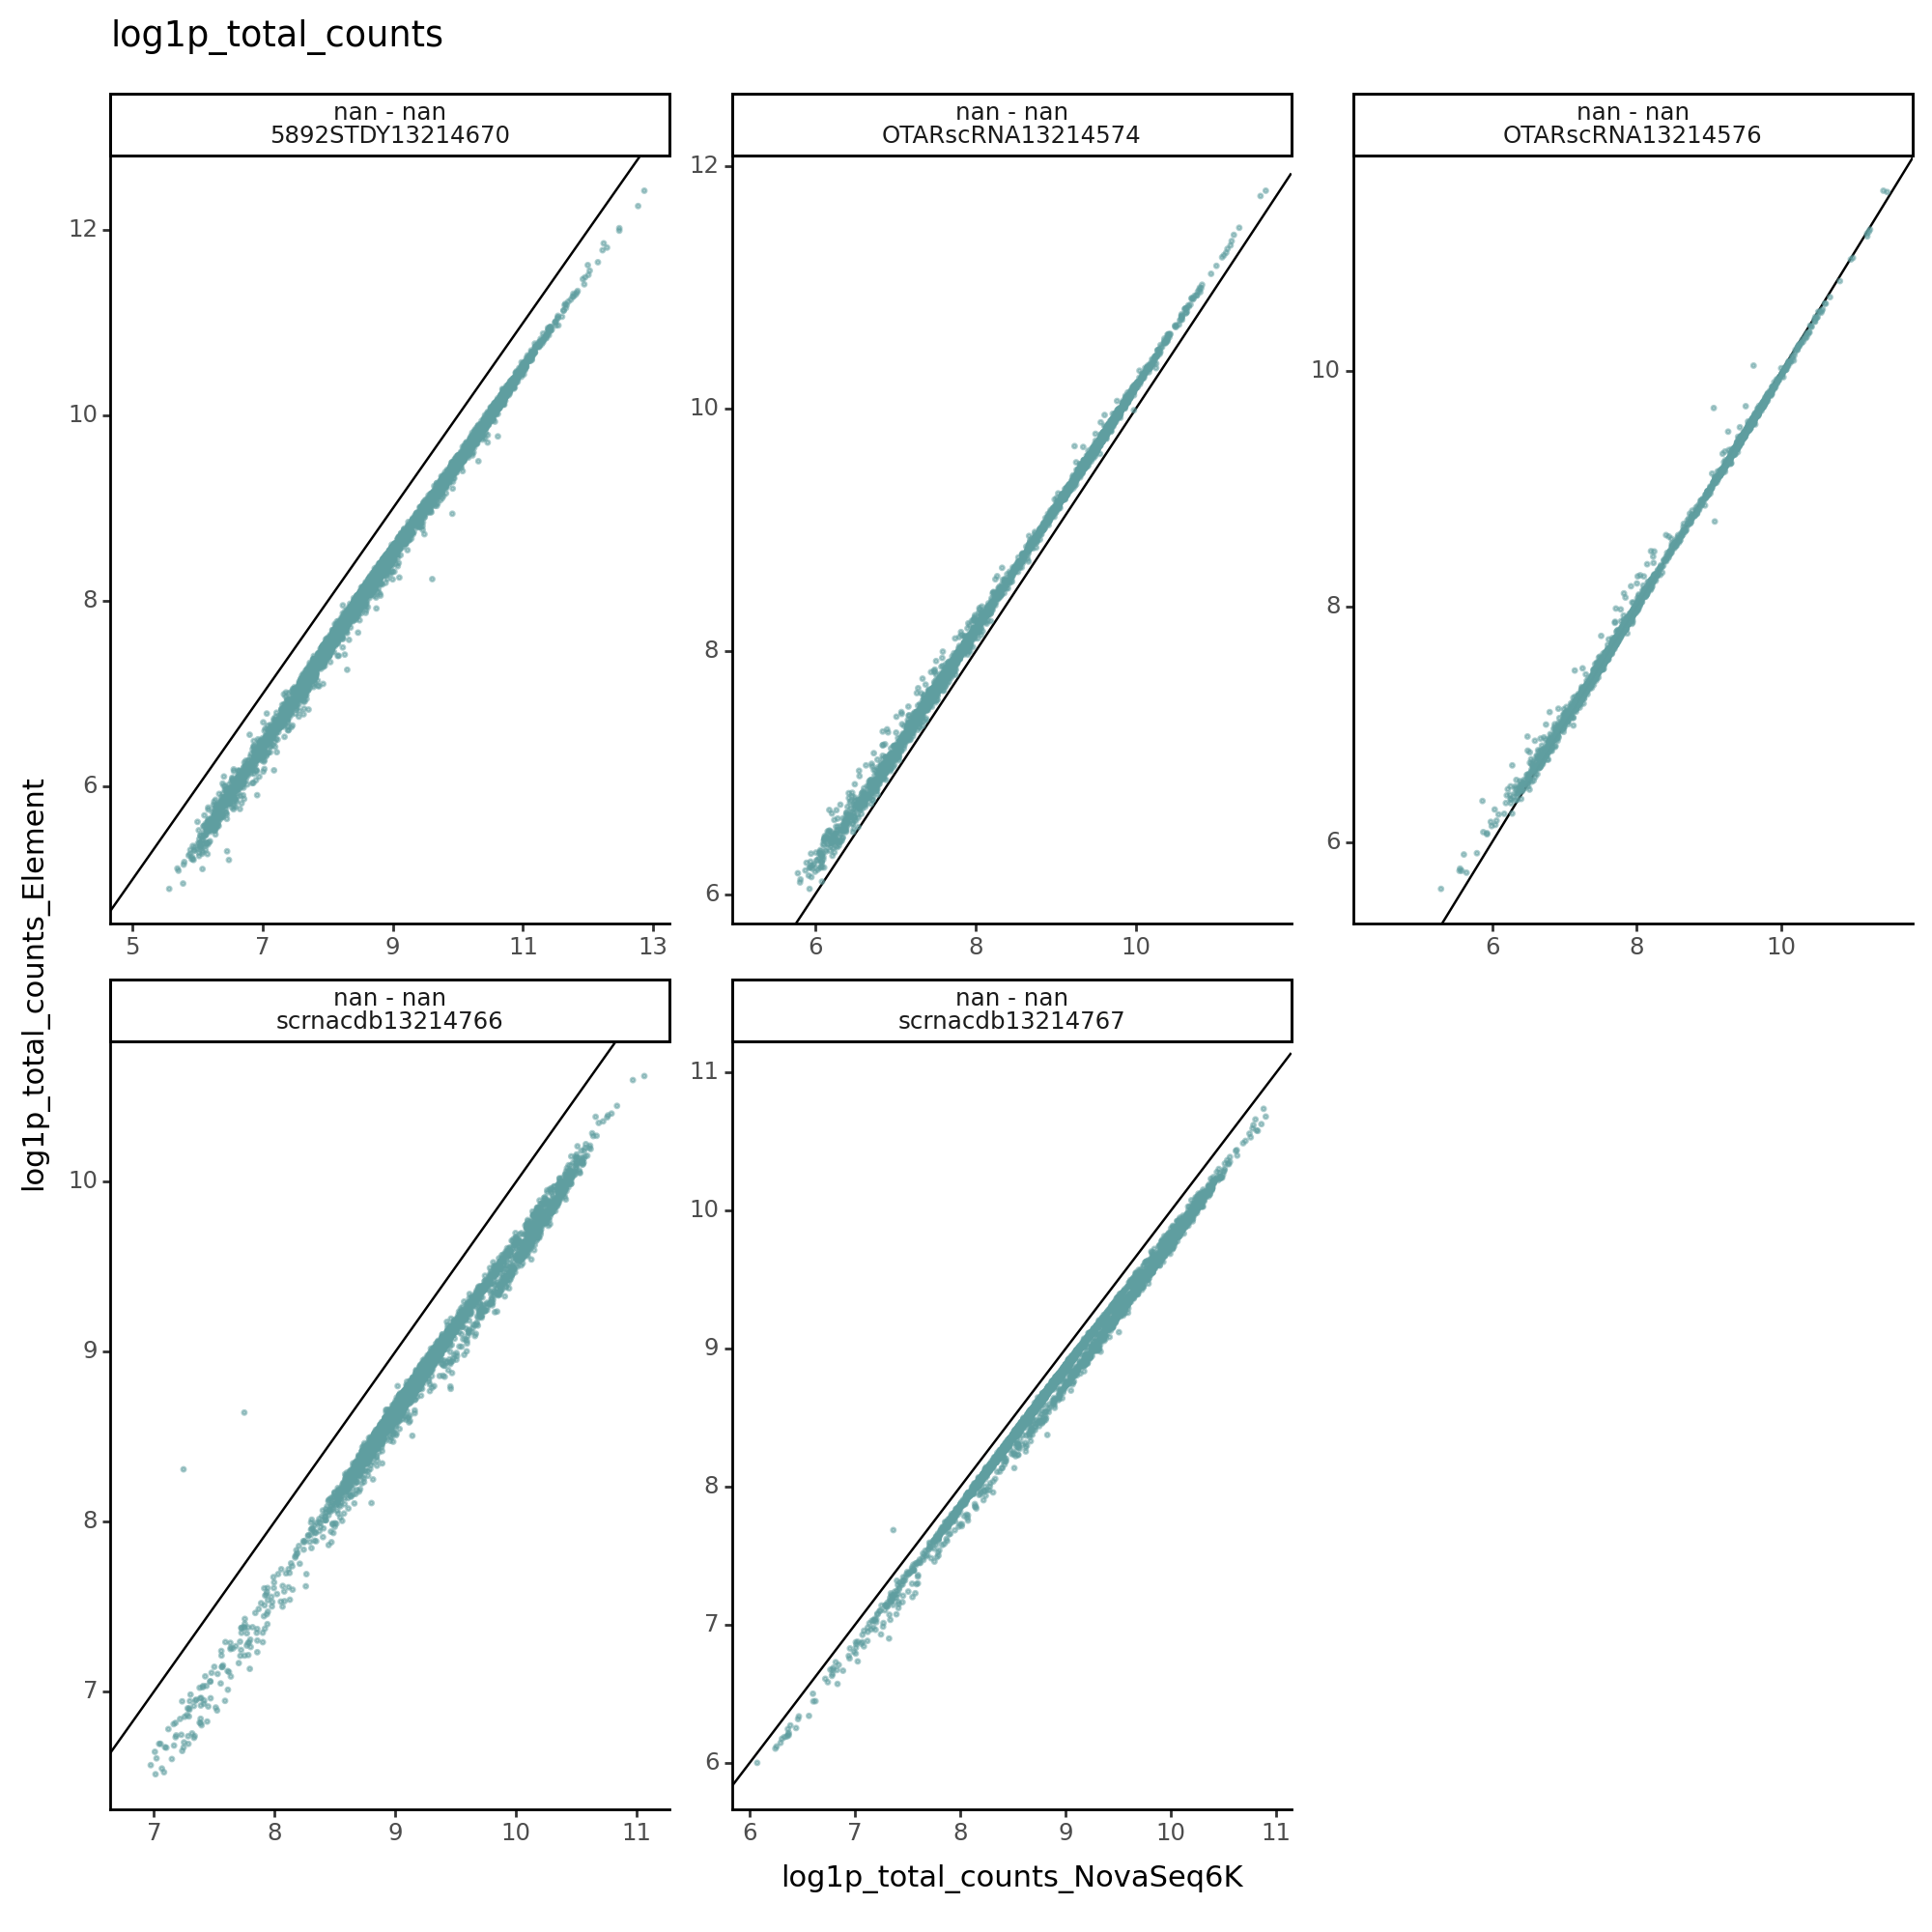

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

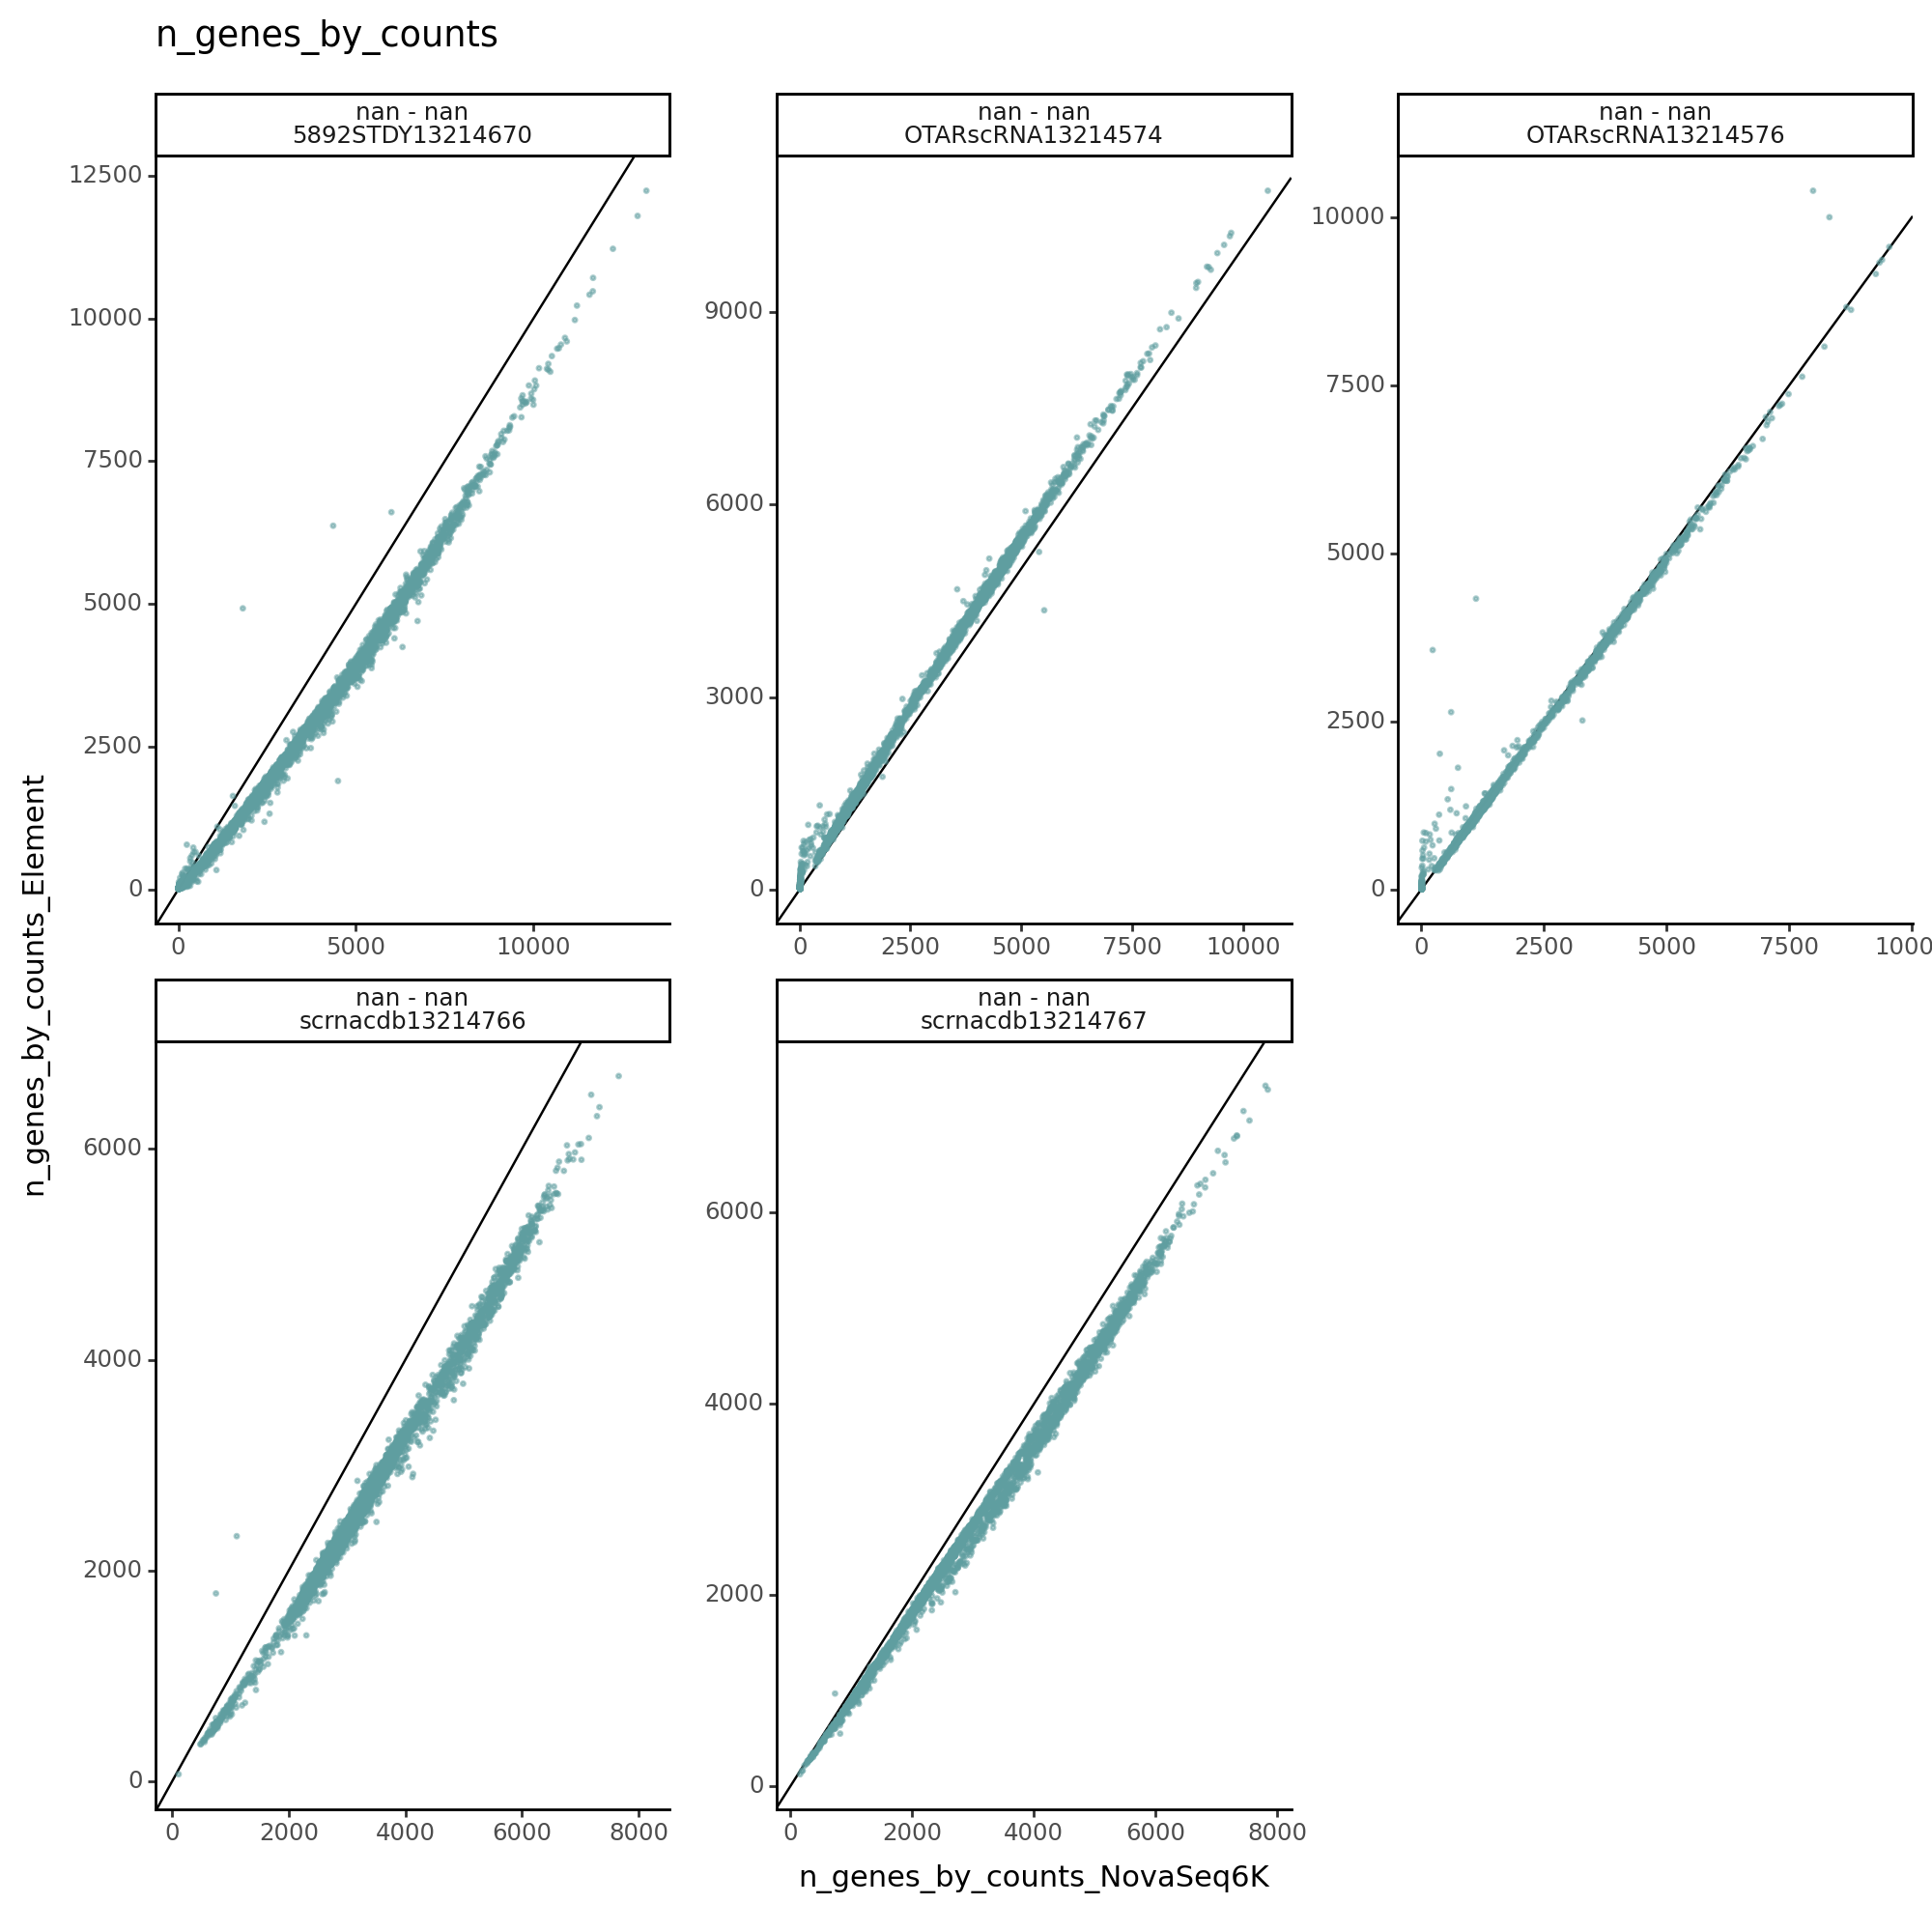

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

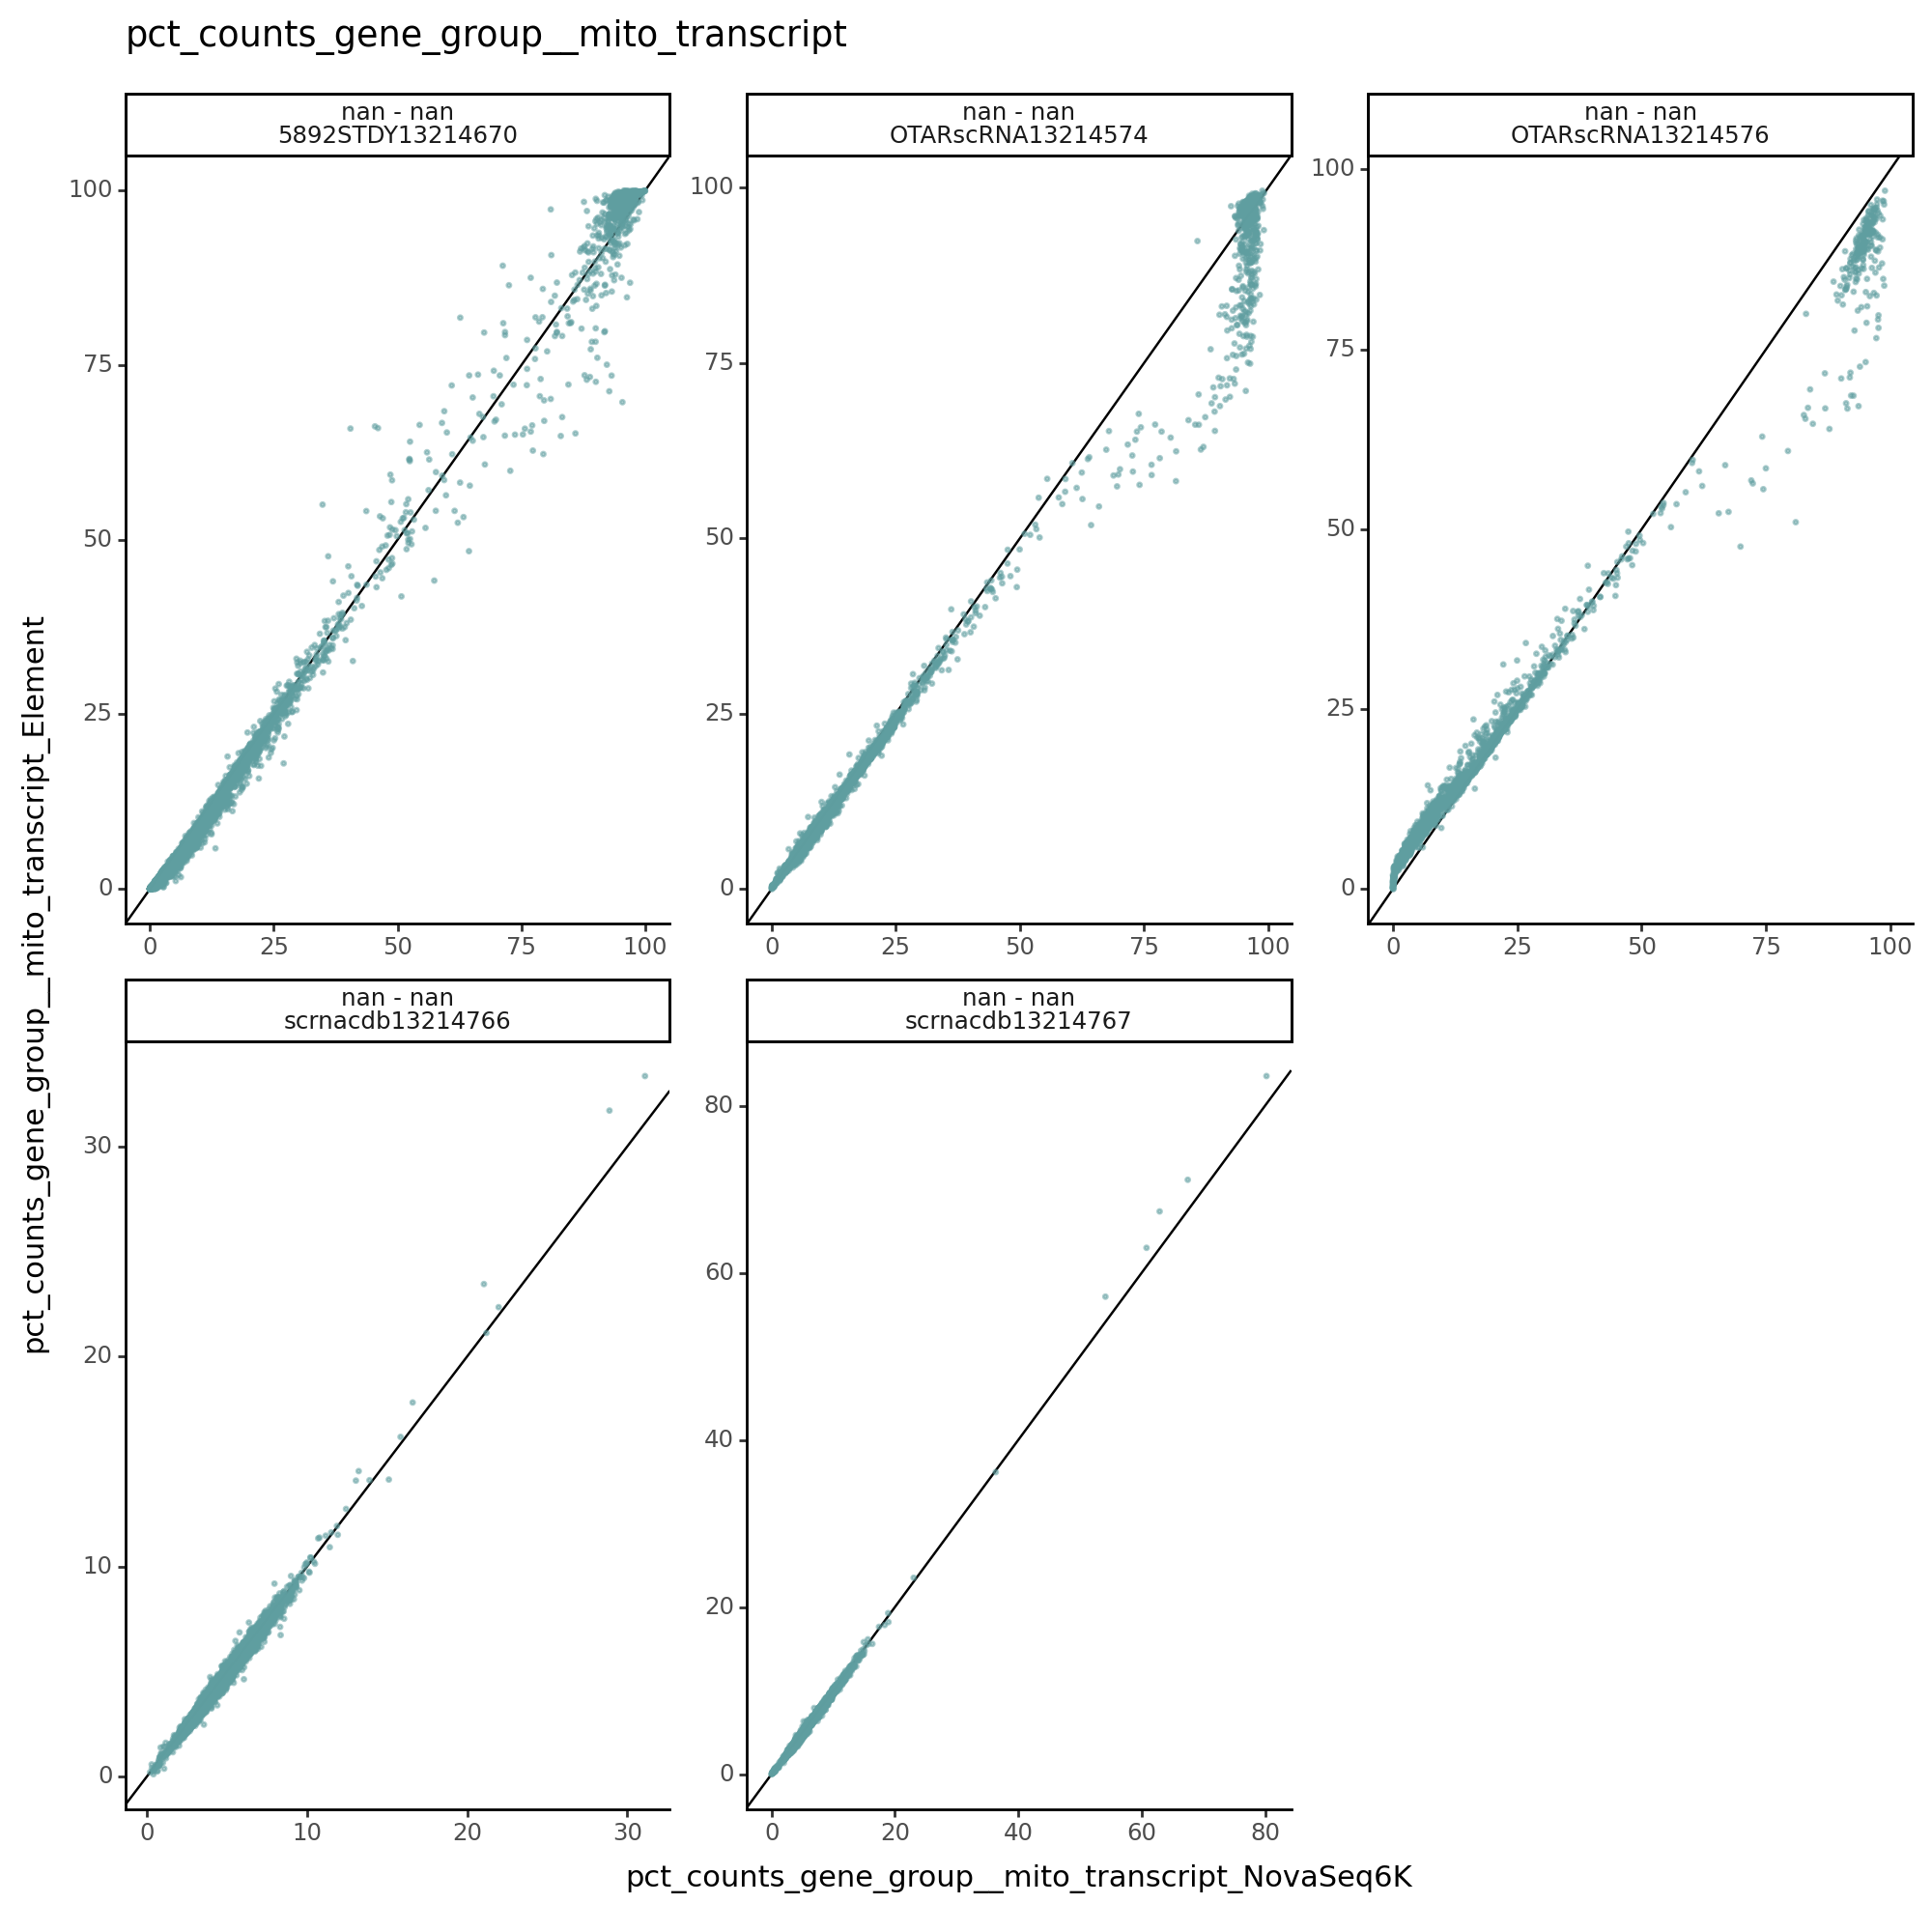

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

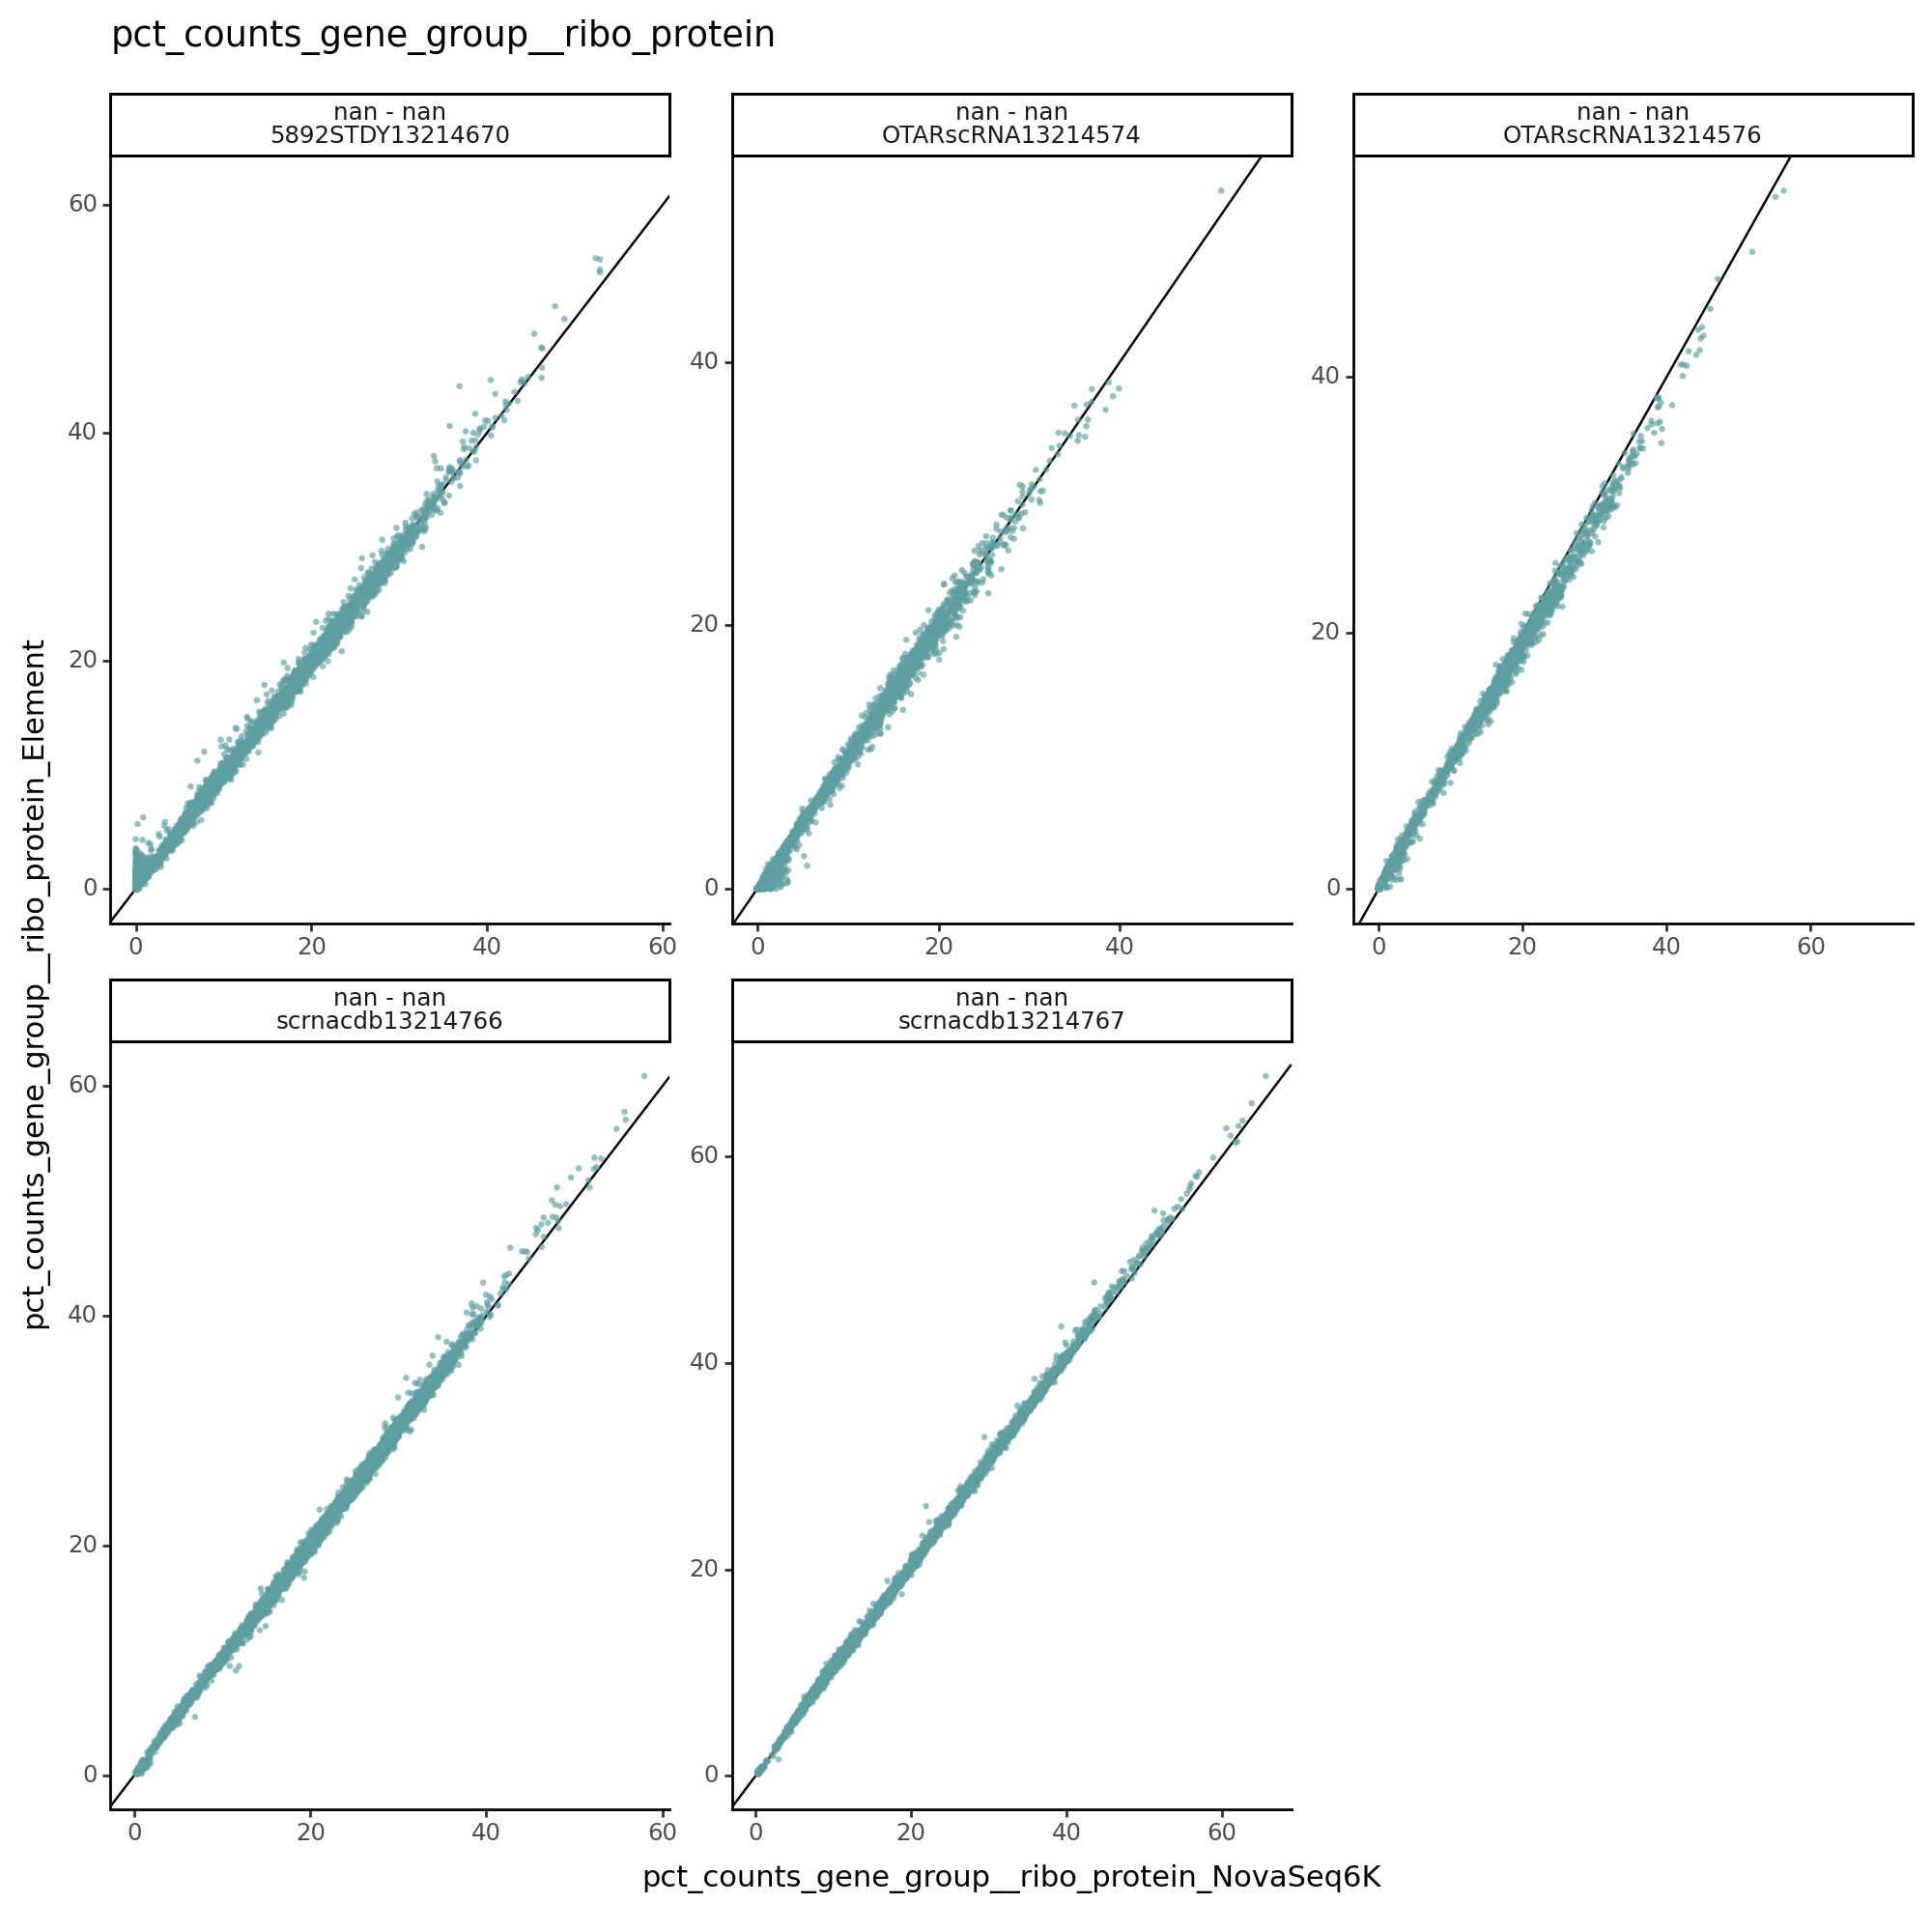

In [27]:
for cov in qc_covs:
    print((
        ggplot(df, aes(x = cov+'_NovaSeq6K', y = cov+'_Element')) +
        geom_abline(color = 'black') +
        geom_point(color = 'cadetblue', size = 0.4, alpha = 0.5) +
        theme_classic() +
        facet_wrap('~ tissue_disease_sample', scales = 'free', ncol = 3) +
        theme(figure_size=(10,10)) +
        labs(title = cov)
    ))

In [ ]:
adata.obs.loc[:,'QC'] = np.nan
adata.obs.loc[:,'QC'] = np.where(adata.obs.biopsy_type == 'blood', np.where(adata.obs.pct_counts_gene_group__mito_transcript < 15 , 
                                                           np.where(adata.obs.total_counts > 30000, 'HighCount', 
                                                                    np.where(np.logical_and(adata.obs.total_counts < 1500, adata.obs.n_genes_by_counts < 800), 
                                                                                    'LowCount', 'Pass')), 'HighMT'), adata.obs.QC)

***Ti***

200 < n_genes < 9K

500 < total_counts 

Mt % < 50  


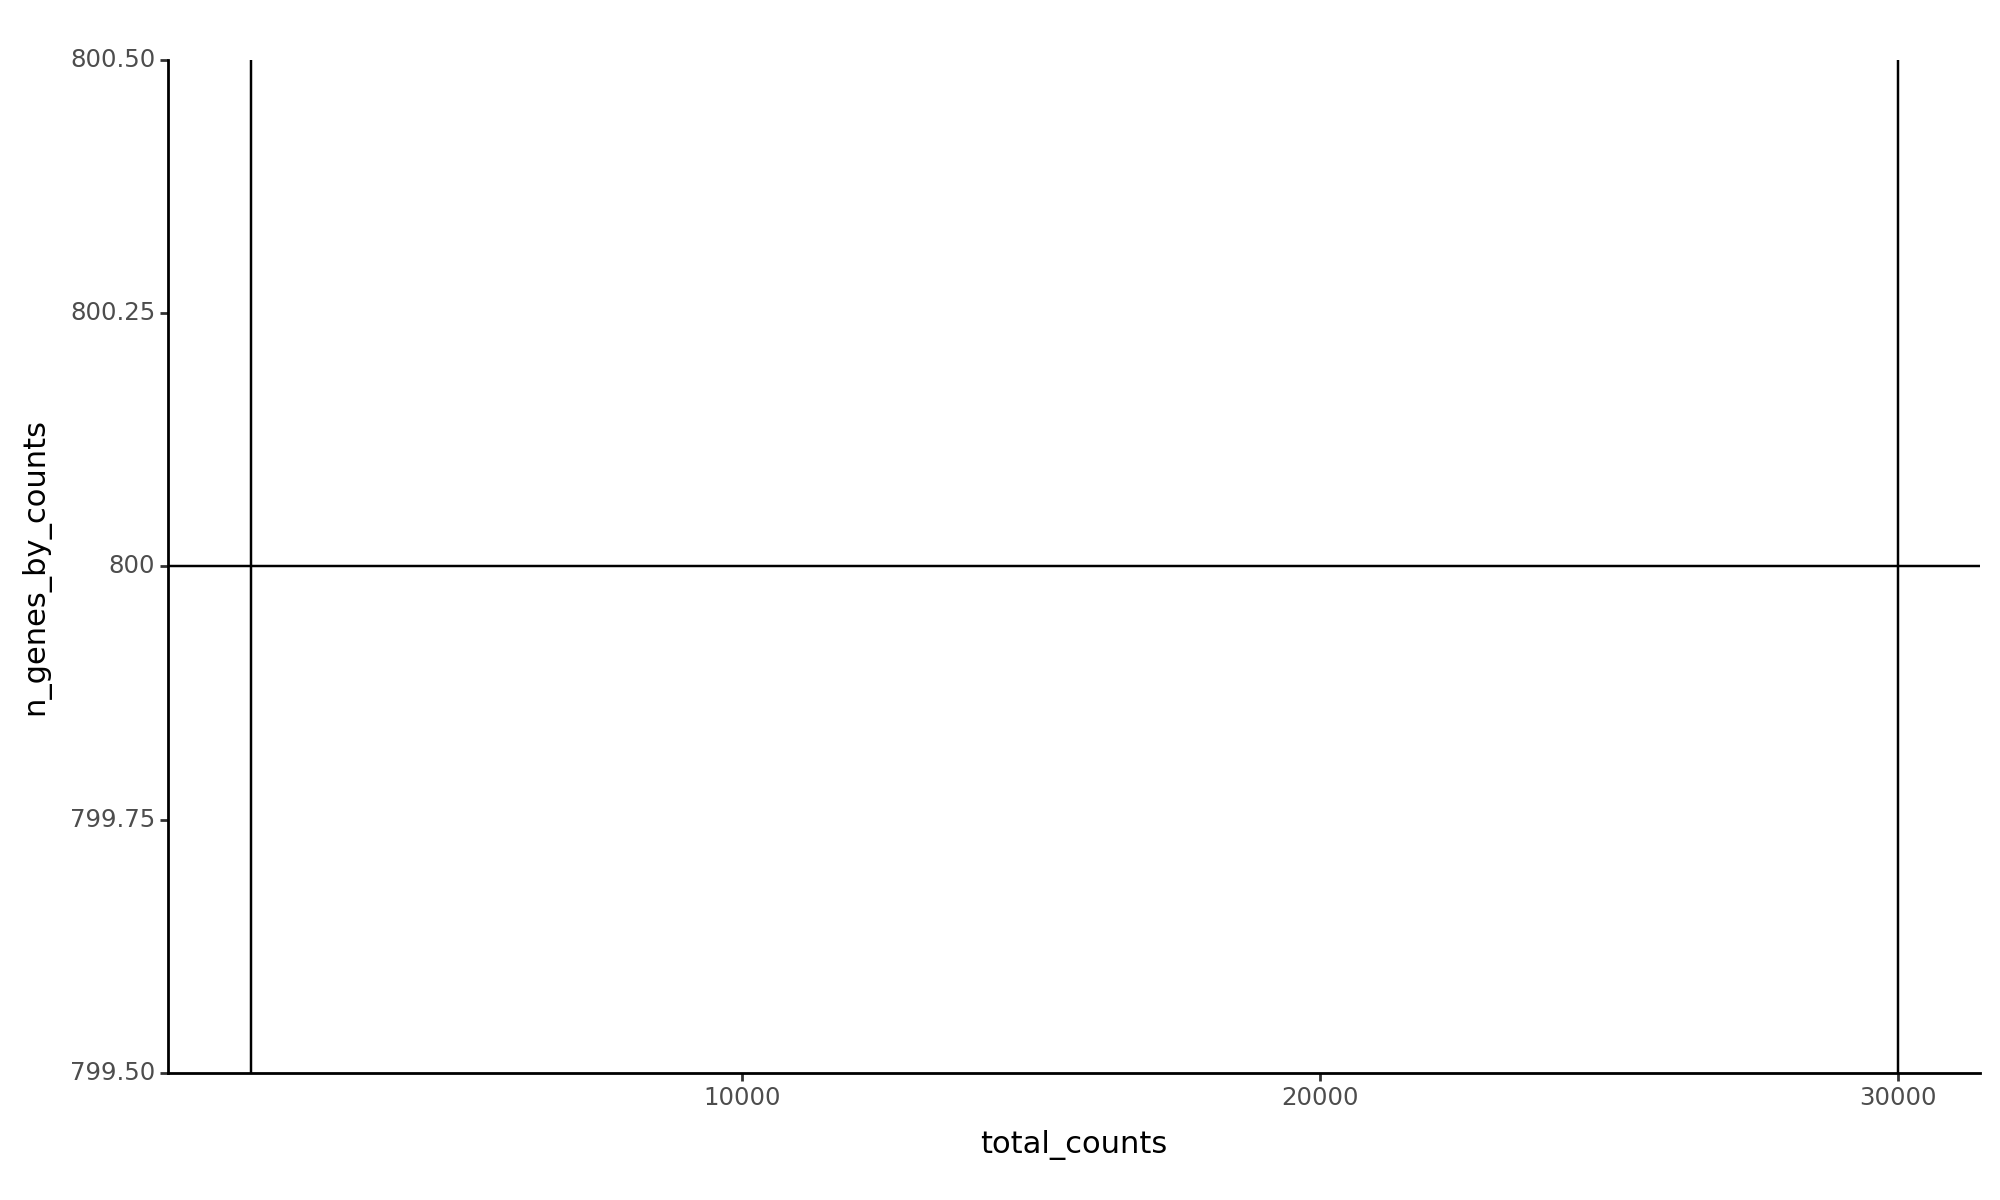

<Figure Size: (1000 x 600)>

In [28]:
adata.obs.loc[:, 'mt_bins'] = pd.cut(adata.obs['pct_counts_gene_group__mito_transcript'], bins=[0, 15, 20, 30, 100], include_lowest=True)
bin_colors = ['bisque', 'olive', 'mediumturquoise', 'dodgerblue']

(
    ggplot(adata.obs[adata.obs['biopsy_type'] == 'blood'], aes(x='total_counts', y='n_genes_by_counts', color='mt_bins')) +
    geom_point(aes(alpha = 'pct_counts_gene_group__mito_transcript < 15'), size=0.9) +
    theme_classic() +
    geom_vline(xintercept=1500) +
    geom_vline(xintercept=30000) +
    geom_hline(yintercept=800) +
    labs(color='mt %') +
    scale_color_manual(values=bin_colors) +  
    scale_alpha_manual(values = [0.9, 0.25]) + 
    theme(figure_size=(10, 6),  legend_position = 'top')
)

In [ ]:
adata.obs.loc[:,'QC'] = np.nan
adata.obs.loc[:,'QC'] = np.where(adata.obs.biopsy_type == 'blood', np.where(adata.obs.pct_counts_gene_group__mito_transcript < 15 , 
                                                           np.where(adata.obs.total_counts > 30000, 'HighCount', 
                                                                    np.where(np.logical_and(adata.obs.total_counts < 1500, adata.obs.n_genes_by_counts < 800), 
                                                                                    'LowCount', 'Pass')), 'HighMT'), adata.obs.QC)

***Ti***

200 < n_genes < 9K

500 < total_counts 

Mt % < 50  


/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/mizani/scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/mizani/scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python

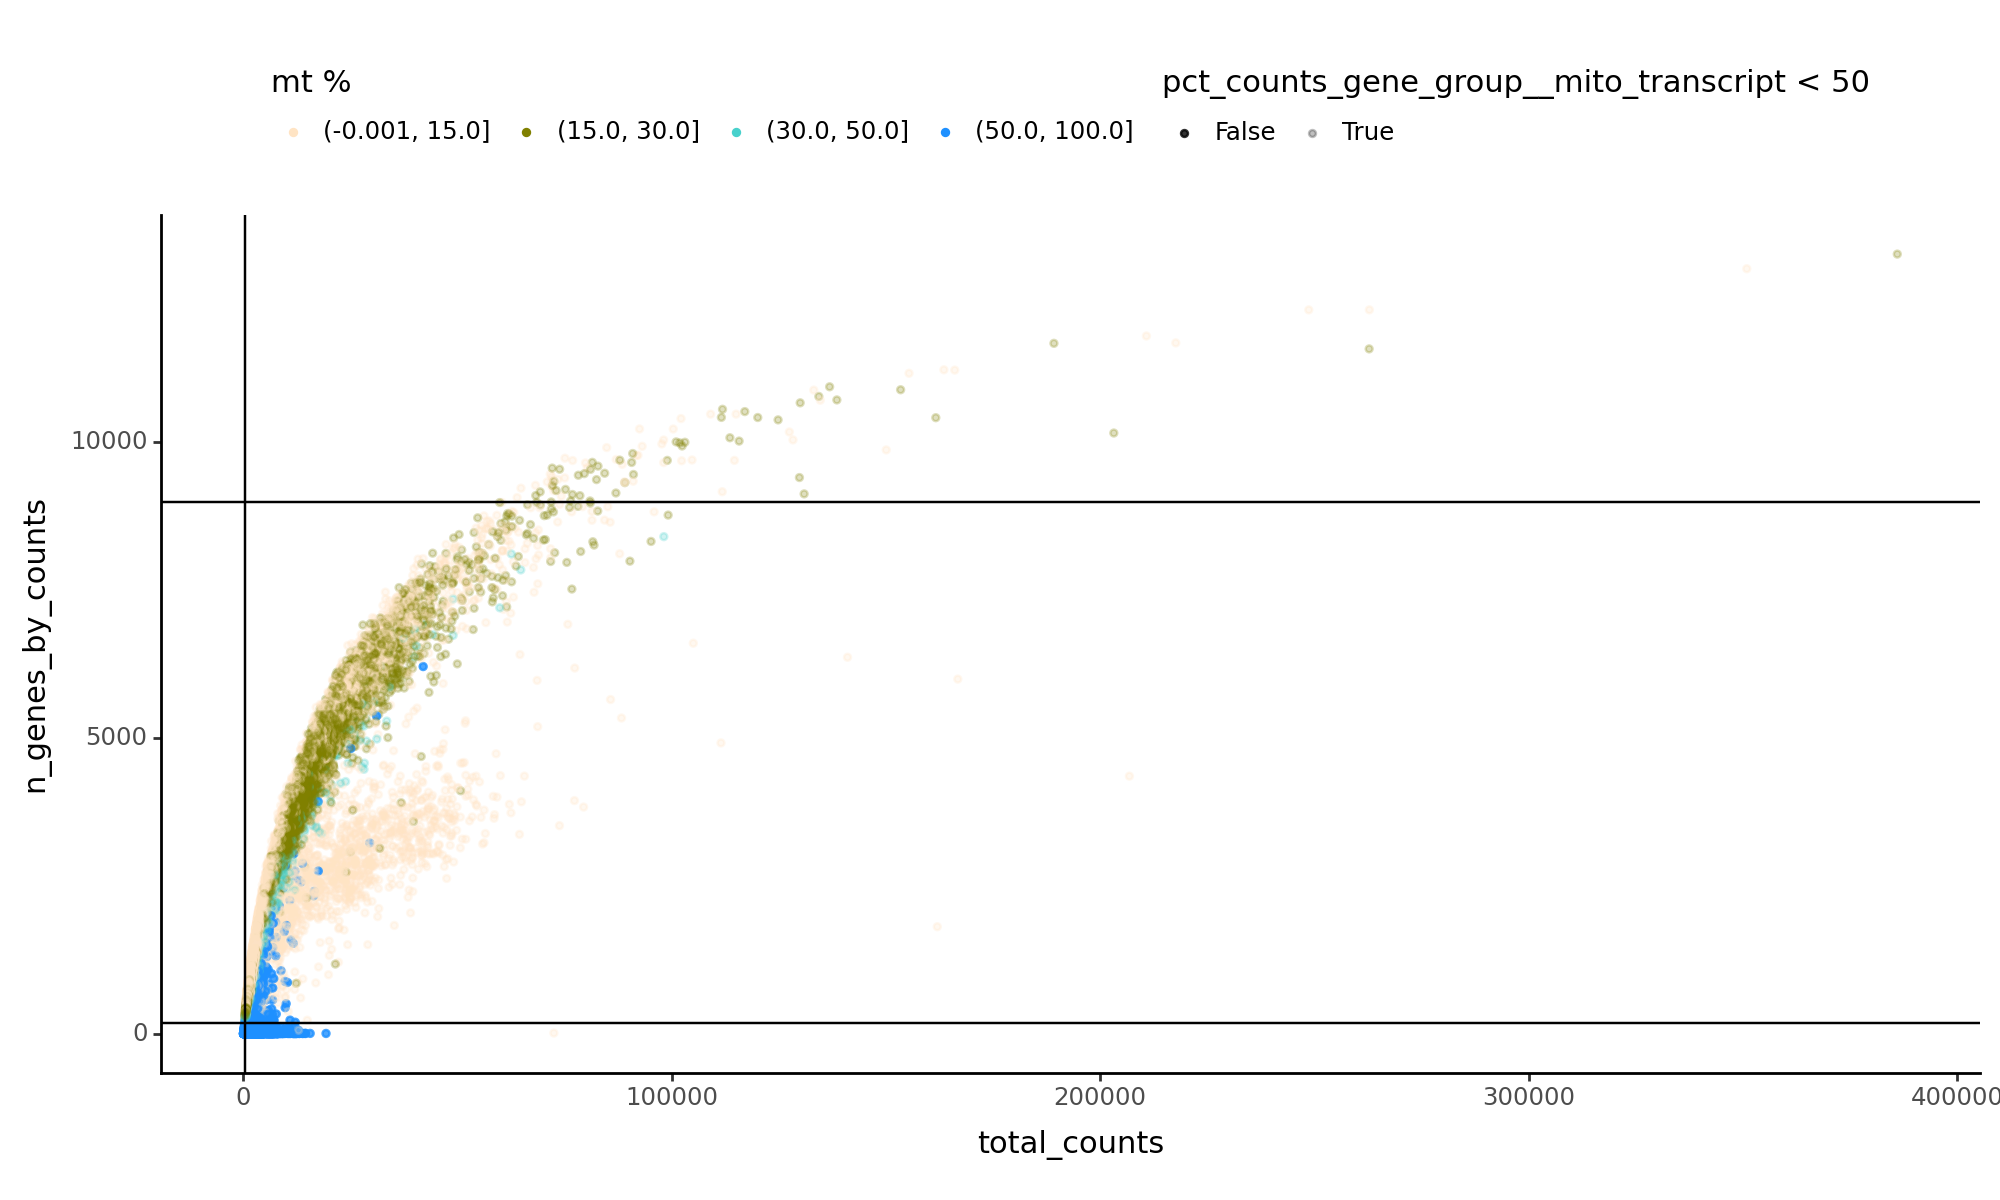

<Figure Size: (1000 x 600)>

In [ ]:
adata.obs.loc[:, 'mt_bins'] = pd.cut(adata.obs['pct_counts_gene_group__mito_transcript'], bins=[0, 15, 30, 50, 100], include_lowest=True)

(
    ggplot(adata.obs[adata.obs['biopsy_type'] == 'ti'], aes(x='total_counts', y='n_genes_by_counts', color='mt_bins')) +
    geom_point(aes(alpha = 'pct_counts_gene_group__mito_transcript < 50'), size=0.9) +
    theme_classic() +
    geom_vline(xintercept=500) +
    geom_hline(yintercept=200) +
    geom_hline(yintercept=9000) +
    labs(color='mt %') +
    scale_color_manual(values=bin_colors) +  
    scale_alpha_manual(values = [0.8, 0.25]) + 
    theme(figure_size=(10, 6),  legend_position = 'top')
)

In [ ]:
# for both ti and rectum
adata.obs.loc[:,'QC'] = np.where(adata.obs.biopsy_type != 'blood', np.where(adata.obs.pct_counts_gene_group__mito_transcript < 50 , 
                                                           np.where(adata.obs.n_genes_by_counts > 9000, 'HighCount', 
                                                                    np.where(np.logical_and(adata.obs.total_counts < 200, adata.obs.n_genes_by_counts < 500), 
                                                                                    'LowCount', 'Pass')), 'HighMT'), adata.obs.QC)

***Number of cell by QC type***

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/p

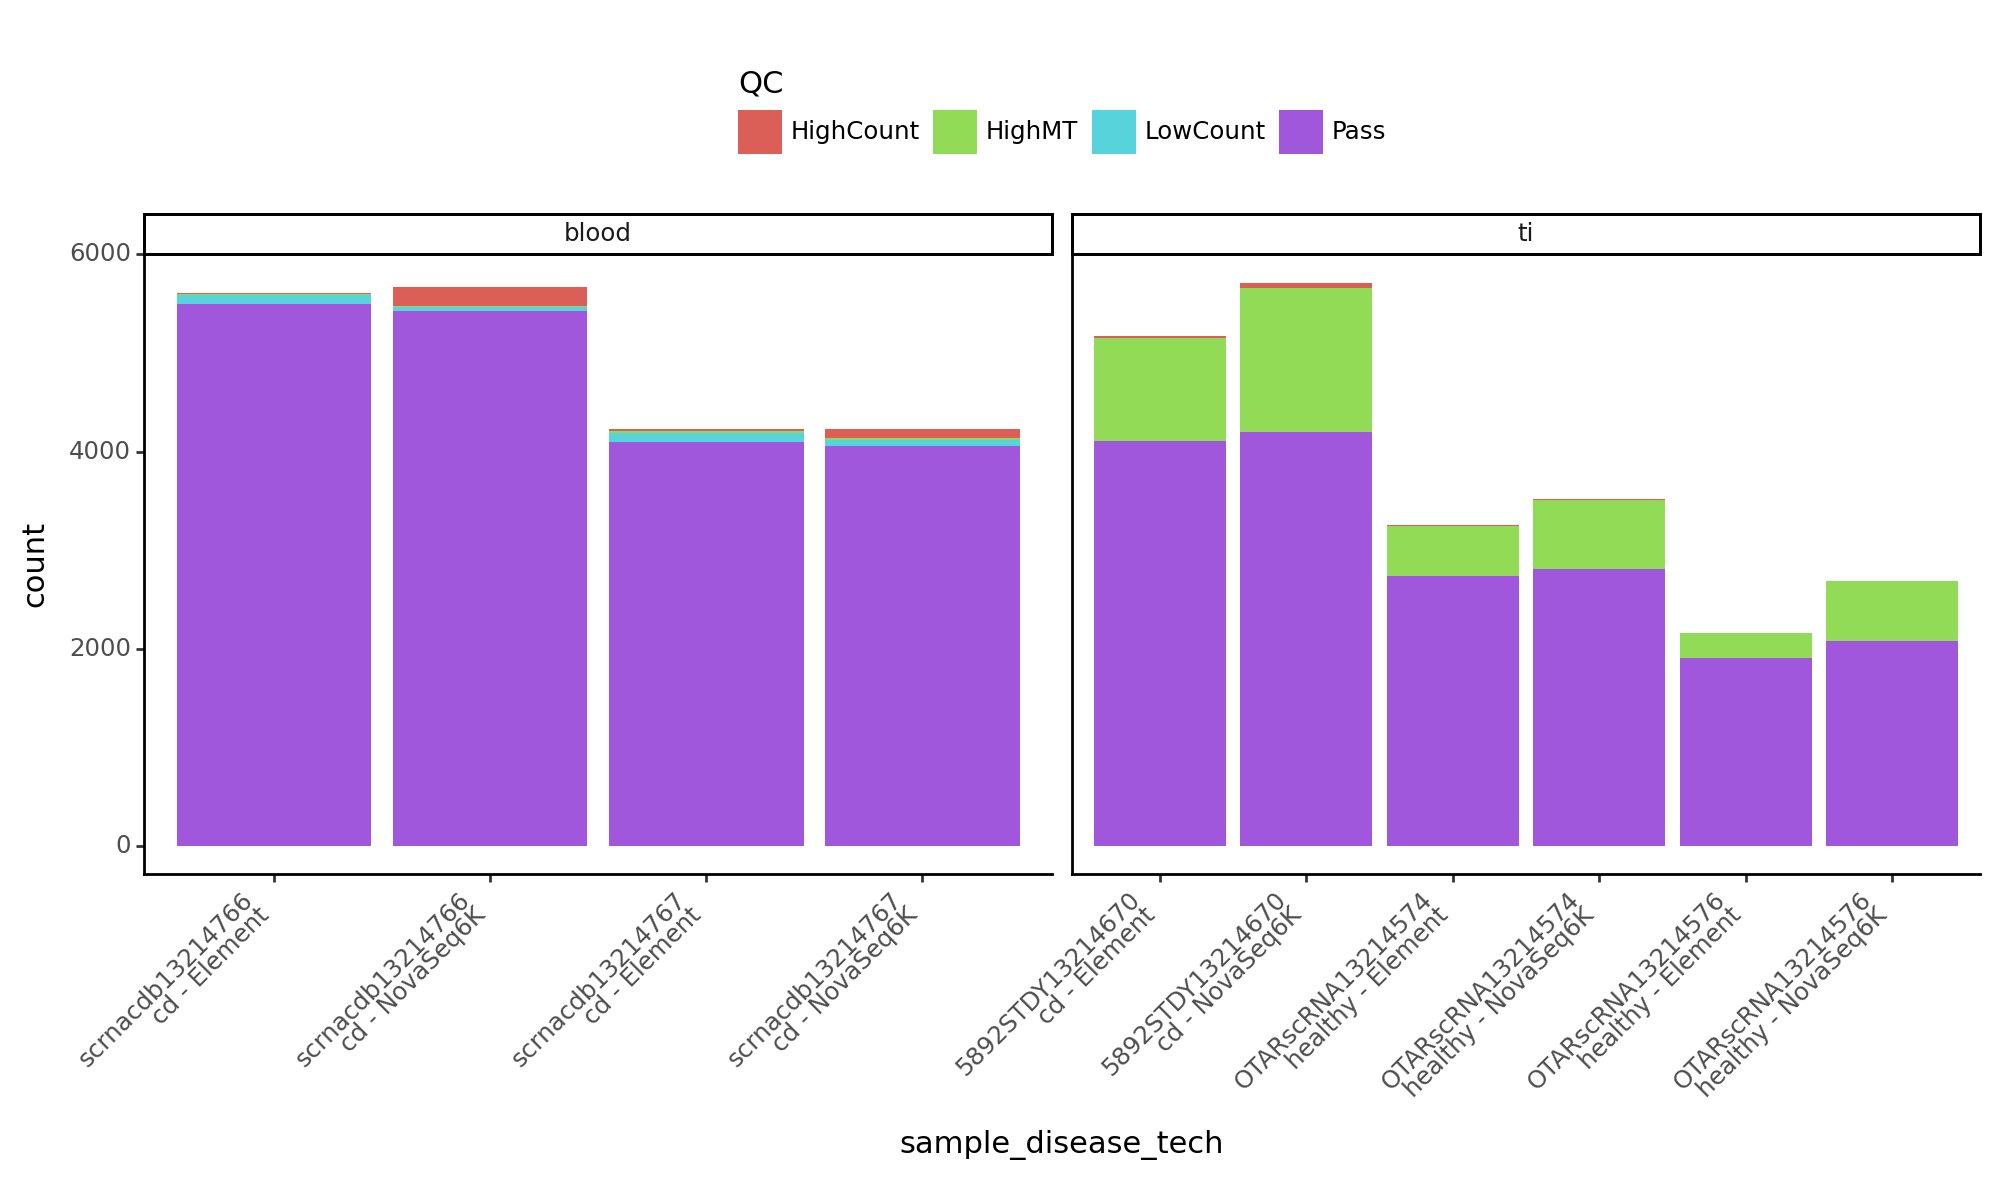

<Figure Size: (1000 x 600)>

In [ ]:
adata.obs.loc[:, 'sample_disease_tech'] = adata.obs.convoluted_samplename.astype('str') + '\n' + adata.obs.disease_status.astype('str')  + ' - ' + adata.obs.tech.astype('str')
(
    ggplot(adata.obs, aes(x = 'sample_disease_tech', fill = 'QC'))+
    geom_bar() + 
    facet_grid('~biopsy_type', scales = 'free', space = 'free') + 
    theme_classic() +
    theme(legend_position= 'top', figure_size=(10, 6), axis_text_x = element_text(angle = 45, hjust = 1))
)

In [ ]:
df = adata.obs[['cellID', 'convoluted_samplename','disease_status', 'biopsy_type', 'QC', 'tech']].pivot(index=['cellID', 'convoluted_samplename','disease_status', 'biopsy_type'], columns='tech')
df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]
df = df.reset_index()
df = df.loc[~np.logical_or(df.QC_NovaSeq6K.isnull(), df.QC_Element.isnull()), :]
(df.QC_NovaSeq6K != df.QC_Element).value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
df2 = df[['convoluted_samplename','disease_status', 'biopsy_type', 'QC_NovaSeq6K', 'QC_Element']].value_counts().reset_index().sort_values([ 'biopsy_type', 'disease_status',])
df2.rename(columns = {0: 'n_cells'}, inplace = True)
df2[df2.QC_NovaSeq6K != df2.QC_Element]

Empty DataFrame
Columns: [convoluted_samplename, disease_status, biopsy_type, QC_NovaSeq6K, QC_Element, count]
Index: []

In [ ]:
adata = adata[adata.obs.cellID.isin(df.cellID[np.logical_and(df.QC_NovaSeq6K == 'Pass', df.QC_Element == 'Pass')])]

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/py

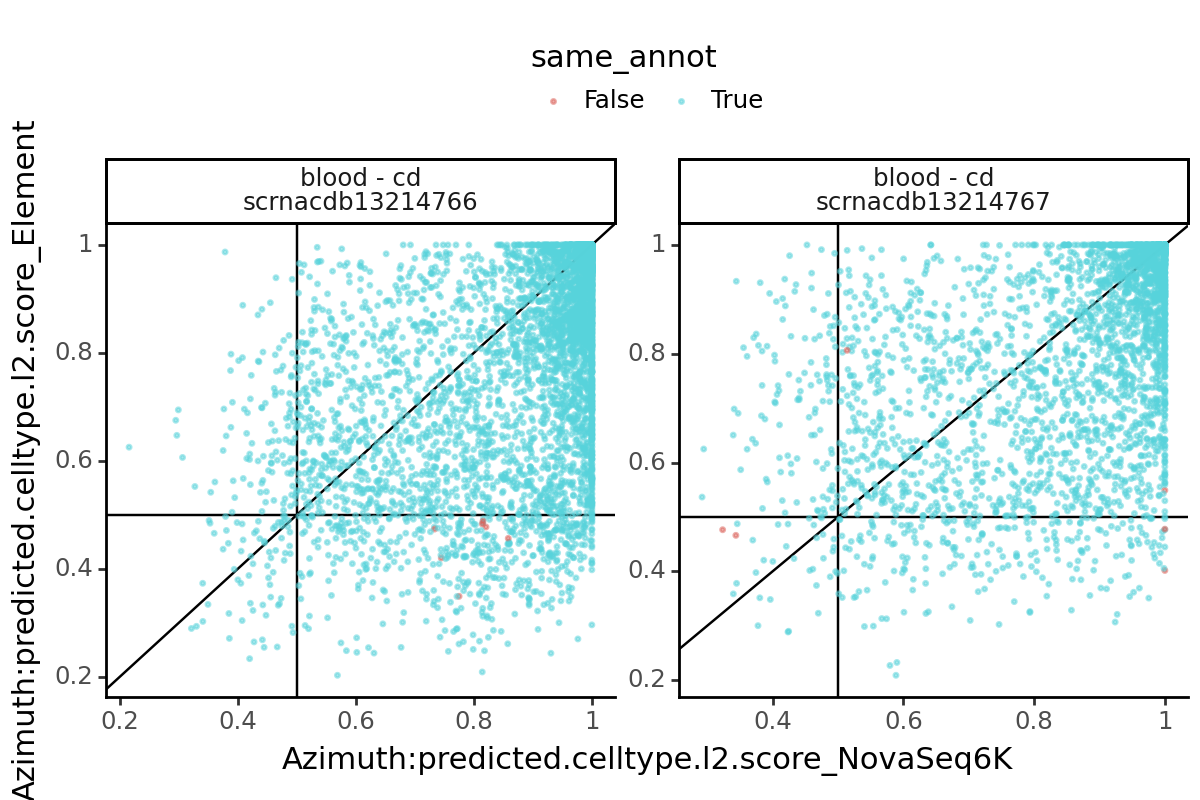

<Figure Size: (600 x 400)>

In [ ]:
df = adata.obs.loc[adata.obs.biopsy_type == 'blood', ['tissue_disease_sample', 'tech', 'cellID', 'Azimuth:L0_predicted.celltype.l2', 'Azimuth:predicted.celltype.l2.score' ]].pivot(index = ['cellID', 'tissue_disease_sample'], columns = 'tech')
df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]
df = df.reset_index()
df.loc[:,'same_annot'] = df['Azimuth:L0_predicted.celltype.l2_NovaSeq6K'] == df['Azimuth:L0_predicted.celltype.l2_Element']
df.same_annot = df.same_annot.astype('str')
(
    ggplot(df, aes(x = 'Azimuth:predicted.celltype.l2.score_NovaSeq6K', y = 'Azimuth:predicted.celltype.l2.score_Element', 
                          color = 'same_annot')) +
    geom_abline(color = 'black') +
    geom_hline(yintercept = 0.5) + 
    geom_vline(xintercept = 0.5) + 
    geom_point( size = 0.4, alpha = 0.5) +
    theme_classic() +
    facet_wrap('~ tissue_disease_sample', scales = 'free', ncol = 3) +
    theme(figure_size=(6,4), legend_position = 'top')
)

In [ ]:
# # Rename columns in keras.obs
# keras.obs.rename(columns={
#     'predicted_celltype': 'Keras:predicted_celltype',
#     'predicted_celltype_probability': 'Keras:predicted_celltype_probability'
# }, inplace=True)

# # Now, you can proceed with your merging operation.
# adata.obs.loc[:, 'index_name'] = adata.obs_names.copy()
# annot = pd.read_csv('/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/lucia_analysis/Rotation_Mo/data/ti/data-clean_annotation-full.csv', index_col=0)
# annot = pd.merge(adata.obs, annot[['category', 'label__machine_retired']], how='left', left_on='Keras:predicted_celltype', right_on='label__machine_retired')
# annot.set_index('index_name', inplace=True)
# adata.obs = annot.loc[adata.obs_names.values, :].copy()

In [ ]:
adata.obs.loc[:, 'index_name'] = adata.obs_names.copy()
annot = pd.read_csv('/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/lucia_analysis/Rotation_Mo/data/ti/data-clean_annotation-full.csv', index_col=0)
annot = pd.merge(adata.obs, annot[['category', 'label__machine_retired']], how = 'left', left_on = 'Keras:predicted_celltype', right_on = 'label__machine_retired')
annot.set_index('index_name', inplace=True)
adata.obs = annot.loc[adata.obs_names.values, :].copy()

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/pandas/core/indexing.py:1813: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/anndata/_core/anndata.py:850: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    []

    Inferred to be: empty



In [ ]:
adata.obs['Keras:predicted_celltype_probability'] = adata.obs['Keras:predicted_celltype_probability'].astype(float)
adata.obs['Azimuth:predicted.celltype.l2.score'] = adata.obs['Azimuth:predicted.celltype.l2.score'].astype(float)

In [ ]:
# sample_name_mapping = {name: name.split("__donor")[0] + "__donor-Element" for name in keras.obs_names}

# # Ensure 'Keras:predicted_celltype' in adata.obs is categorical
# if adata.obs['Keras:predicted_celltype'].dtype != 'category':
#     adata.obs['Keras:predicted_celltype'] = adata.obs['Keras:predicted_celltype'].astype('category')

# categories_adata = adata.obs['Keras:predicted_celltype'].cat.categories.tolist()
# categories_keras = keras.obs['Keras:predicted_celltype'].unique().tolist()

# all_categories = list(set(categories_adata + categories_keras))

# # Update categories
# adata.obs['Keras:predicted_celltype'] = adata.obs['Keras:predicted_celltype'].cat.set_categories(all_categories)

# # Update adata's category column if it doesn't exist
# if 'category' not in adata.obs.columns:
#     adata.obs['category'] = np.nan

# for original_name, new_name in sample_name_mapping.items():
#     if original_name in keras.obs_names and new_name in adata_elements.index:
#         adata_elements.loc[new_name, 'Keras:predicted_celltype'] = keras.obs.loc[original_name, 'Keras:predicted_celltype']
#         adata_elements.loc[new_name, 'Keras:predicted_celltype_probability'] = keras.obs.loc[original_name, 'Keras:predicted_celltype_probability']
#         # Transfer the 'category' column values
#         adata_elements.loc[new_name, 'category'] = keras.obs.loc[original_name, 'category']

# # Update the main dataframe
# adata.obs.loc[adata_elements.index] = adata_elements

# print(adata.obs.loc[adata.obs['tech'] == 'Element', ['Keras:predicted_celltype', 'Keras:predicted_celltype_probability', 'category']].head())


In [ ]:
annot  = {'blood' : ['Azimuth:L0_predicted.celltype.l2', 'Azimuth:L1_predicted.celltype.l2', 'Azimuth:predicted.celltype.l2'],'ti': ['Keras:predicted_celltype']}
annot_prob = {'blood': 'Azimuth:predicted.celltype.l2.score', 'ti': 'Keras:predicted_celltype_probability'}
res = {'biopsy_type':[], 'celltype_pred' : [], 'n_categories': [], 'n_different_cells': [], 'pct_different_cells': []}
for t in ['blood', 'ti']:
    for a in annot[t]:
        res['biopsy_type'].append(t)
        res['celltype_pred'].append(a)
        new_col = a + '_prob5'
        adata.obs.loc[:, new_col] = adata.obs[a].astype('str').copy()
        res['n_categories'].append(len(adata.obs[new_col].unique()))
        df = adata.obs.loc[adata.obs.biopsy_type == t,['cellID', 'convoluted_samplename','disease_status', 'biopsy_type', 'tech', new_col] ].pivot(index=['cellID', 'convoluted_samplename','disease_status', 'biopsy_type'], columns='tech')
        df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]
        df = df.reset_index()
        n = sum(df[new_col + '_NovaSeq6K']!= df[new_col + '_Element'])
        res['n_different_cells'].append(n)
        res['pct_different_cells'].append(n/df.shape[0]*100)

KeyError: 'Azimuth:L0_predicted.celltype.l2_prob5_NovaSeq6K'

In [ ]:
df = adata.obs.loc[adata.obs.biopsy_type == 'ti',['cellID', 'convoluted_samplename','disease_status', 'biopsy_type', 'tech', 'Keras:predicted_celltype'] ].pivot(index=['cellID', 'convoluted_samplename','disease_status', 'biopsy_type'], columns='tech')
df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]
df = df.reset_index()
df = df[['Keras:predicted_celltype_NovaSeq6K', 'Keras:predicted_celltype_Element']].value_counts().reset_index()
df.rename(columns = {0: 'n_cells'}, inplace = True)
df.loc[df['Keras:predicted_celltype_NovaSeq6K'] != df['Keras:predicted_celltype_Element'] ,:].head(15)

Keras:predicted_celltype_NovaSeq6K  \
1                                        T_cell_CD8_1   
4                  B_cell_plasma_IgA_CD38plusplusplus   
8                             T_cell_CD4_CD40LGplus_2   
14                     B_cell_plasma_IgA_CD38plusplus   
15                                    T_cell_CD4_Treg   
20                            T_cell_CD4_CD40LGplus_1   
21                            T_cell_CD4_CD40LGplus_3   
22  Enterocyte_progenitor_crypt_OLFM4plusplus_KRT2...   
24                                    B_cell_memory_2   
28                            Mac_resident_IL10RAplus   
30                         B_cell_plasma_IgA_CD38plus   
31  Enterocyte_progenitor_crypt_OLFM4plusplus_KRT2...   
32                     B_cell_plasma_IgA_CD38plusplus   
33                                   MoMac_IL10RAplus   
34                           Mac_resident_IL10RAminus   

                     Keras:predicted_celltype_Element  count  
1                  T_cell_CD8plus_tissueminusresident    528  
4                                 B_cell_plasma_IgA_3    344  
8                    T_cell_CD4plus_PASKplus_CCR7plus    285  
14                                B_cell_plasma_IgA_2    175  
15                                T_cell_CD4plus_Treg    174  
20                              T_cell_CD4plus_memory    124  
21                    T_cell_CD4plus_CXCR6plus_memory    110  
22  Enterocyte_precursor_crypt_OLFM4plus_KRT20plus...     96  
24                                    B_cell_memory_1     88  
28                                              Mac_1     56  
30                                B_cell_plasma_IgA_1     54  
31  Enterocyte_progenitor_crypt_OLFM4plusplus_KRT2...     53  
32                                B_cell_plasma_IgA_3     51  
33                                 Mac_intermediate_1     50  
34                                              Mac_2     44

In [ ]:
# df = adata.obs.loc[adata.obs.biopsy_type == 'ti',['cellID', 'convoluted_samplename','disease_status', 'biopsy_type', 'tech', 'Keras:predicted_celltype'] ].pivot(index=['cellID', 'convoluted_samplename','disease_status', 'biopsy_type'], columns='tech')
# df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]
# df = df.reset_index()
# df = df[['Keras:predicted_celltype_NovaSeq6K', 'Keras:predicted_celltype_Element']].value_counts().reset_index()
# df.rename(columns = {0: 'n_cells'}, inplace = True)


/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/py

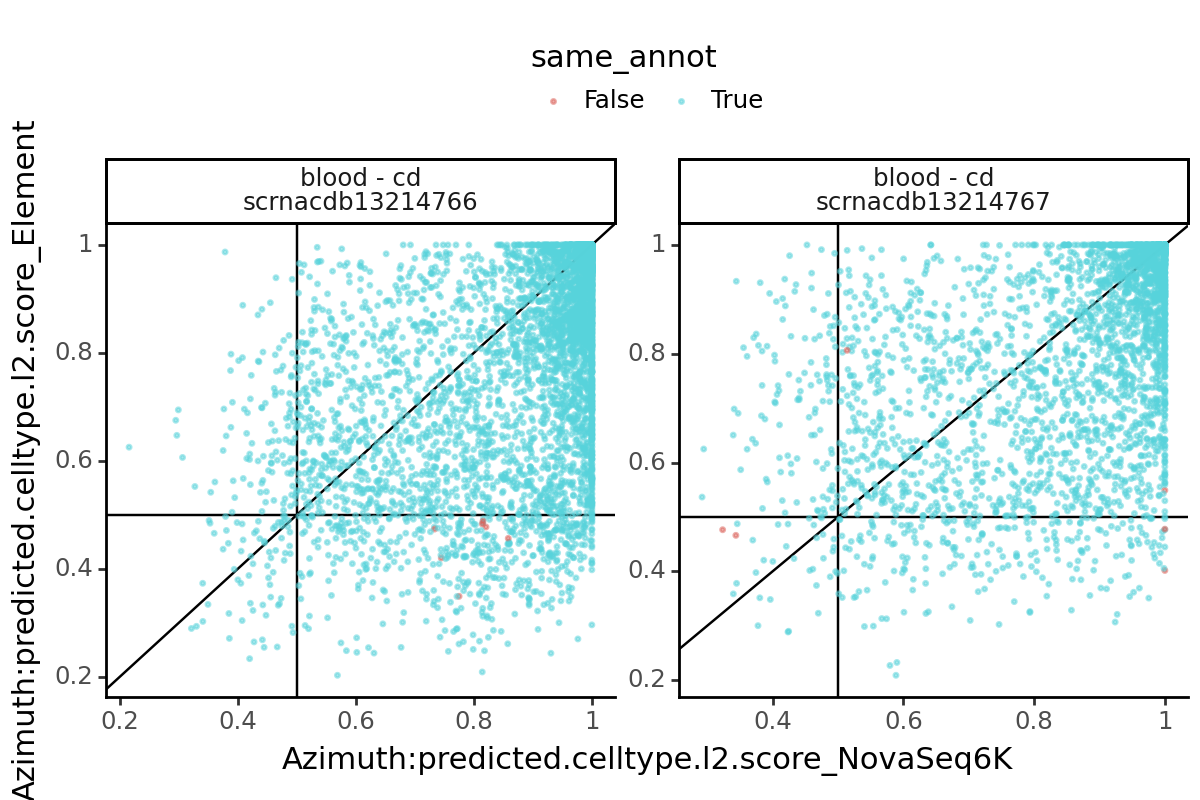

<Figure Size: (600 x 400)>

In [ ]:
df = adata.obs.loc[adata.obs.biopsy_type == 'blood', ['tissue_disease_sample', 'tech', 'cellID', 'Azimuth:L0_predicted.celltype.l2', 'Azimuth:predicted.celltype.l2.score' ]].pivot(index = ['cellID', 'tissue_disease_sample'], columns = 'tech')
df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]
df = df.reset_index()
df.loc[:,'same_annot'] = df['Azimuth:L0_predicted.celltype.l2_NovaSeq6K'] == df['Azimuth:L0_predicted.celltype.l2_Element']
df.same_annot = df.same_annot.astype('str')
(
    ggplot(df, aes(x = 'Azimuth:predicted.celltype.l2.score_NovaSeq6K', y = 'Azimuth:predicted.celltype.l2.score_Element', 
                          color = 'same_annot')) +
    geom_abline(color = 'black') +
    geom_hline(yintercept = 0.5) + 
    geom_vline(xintercept = 0.5) + 
    geom_point( size = 0.4, alpha = 0.5) +
    theme_classic() +
    facet_wrap('~ tissue_disease_sample', scales = 'free', ncol = 3) +
    theme(figure_size=(6,4), legend_position = 'top')
)

/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/python3.10/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/software/team152/marcus/miniconda3/envs/test/lib/py

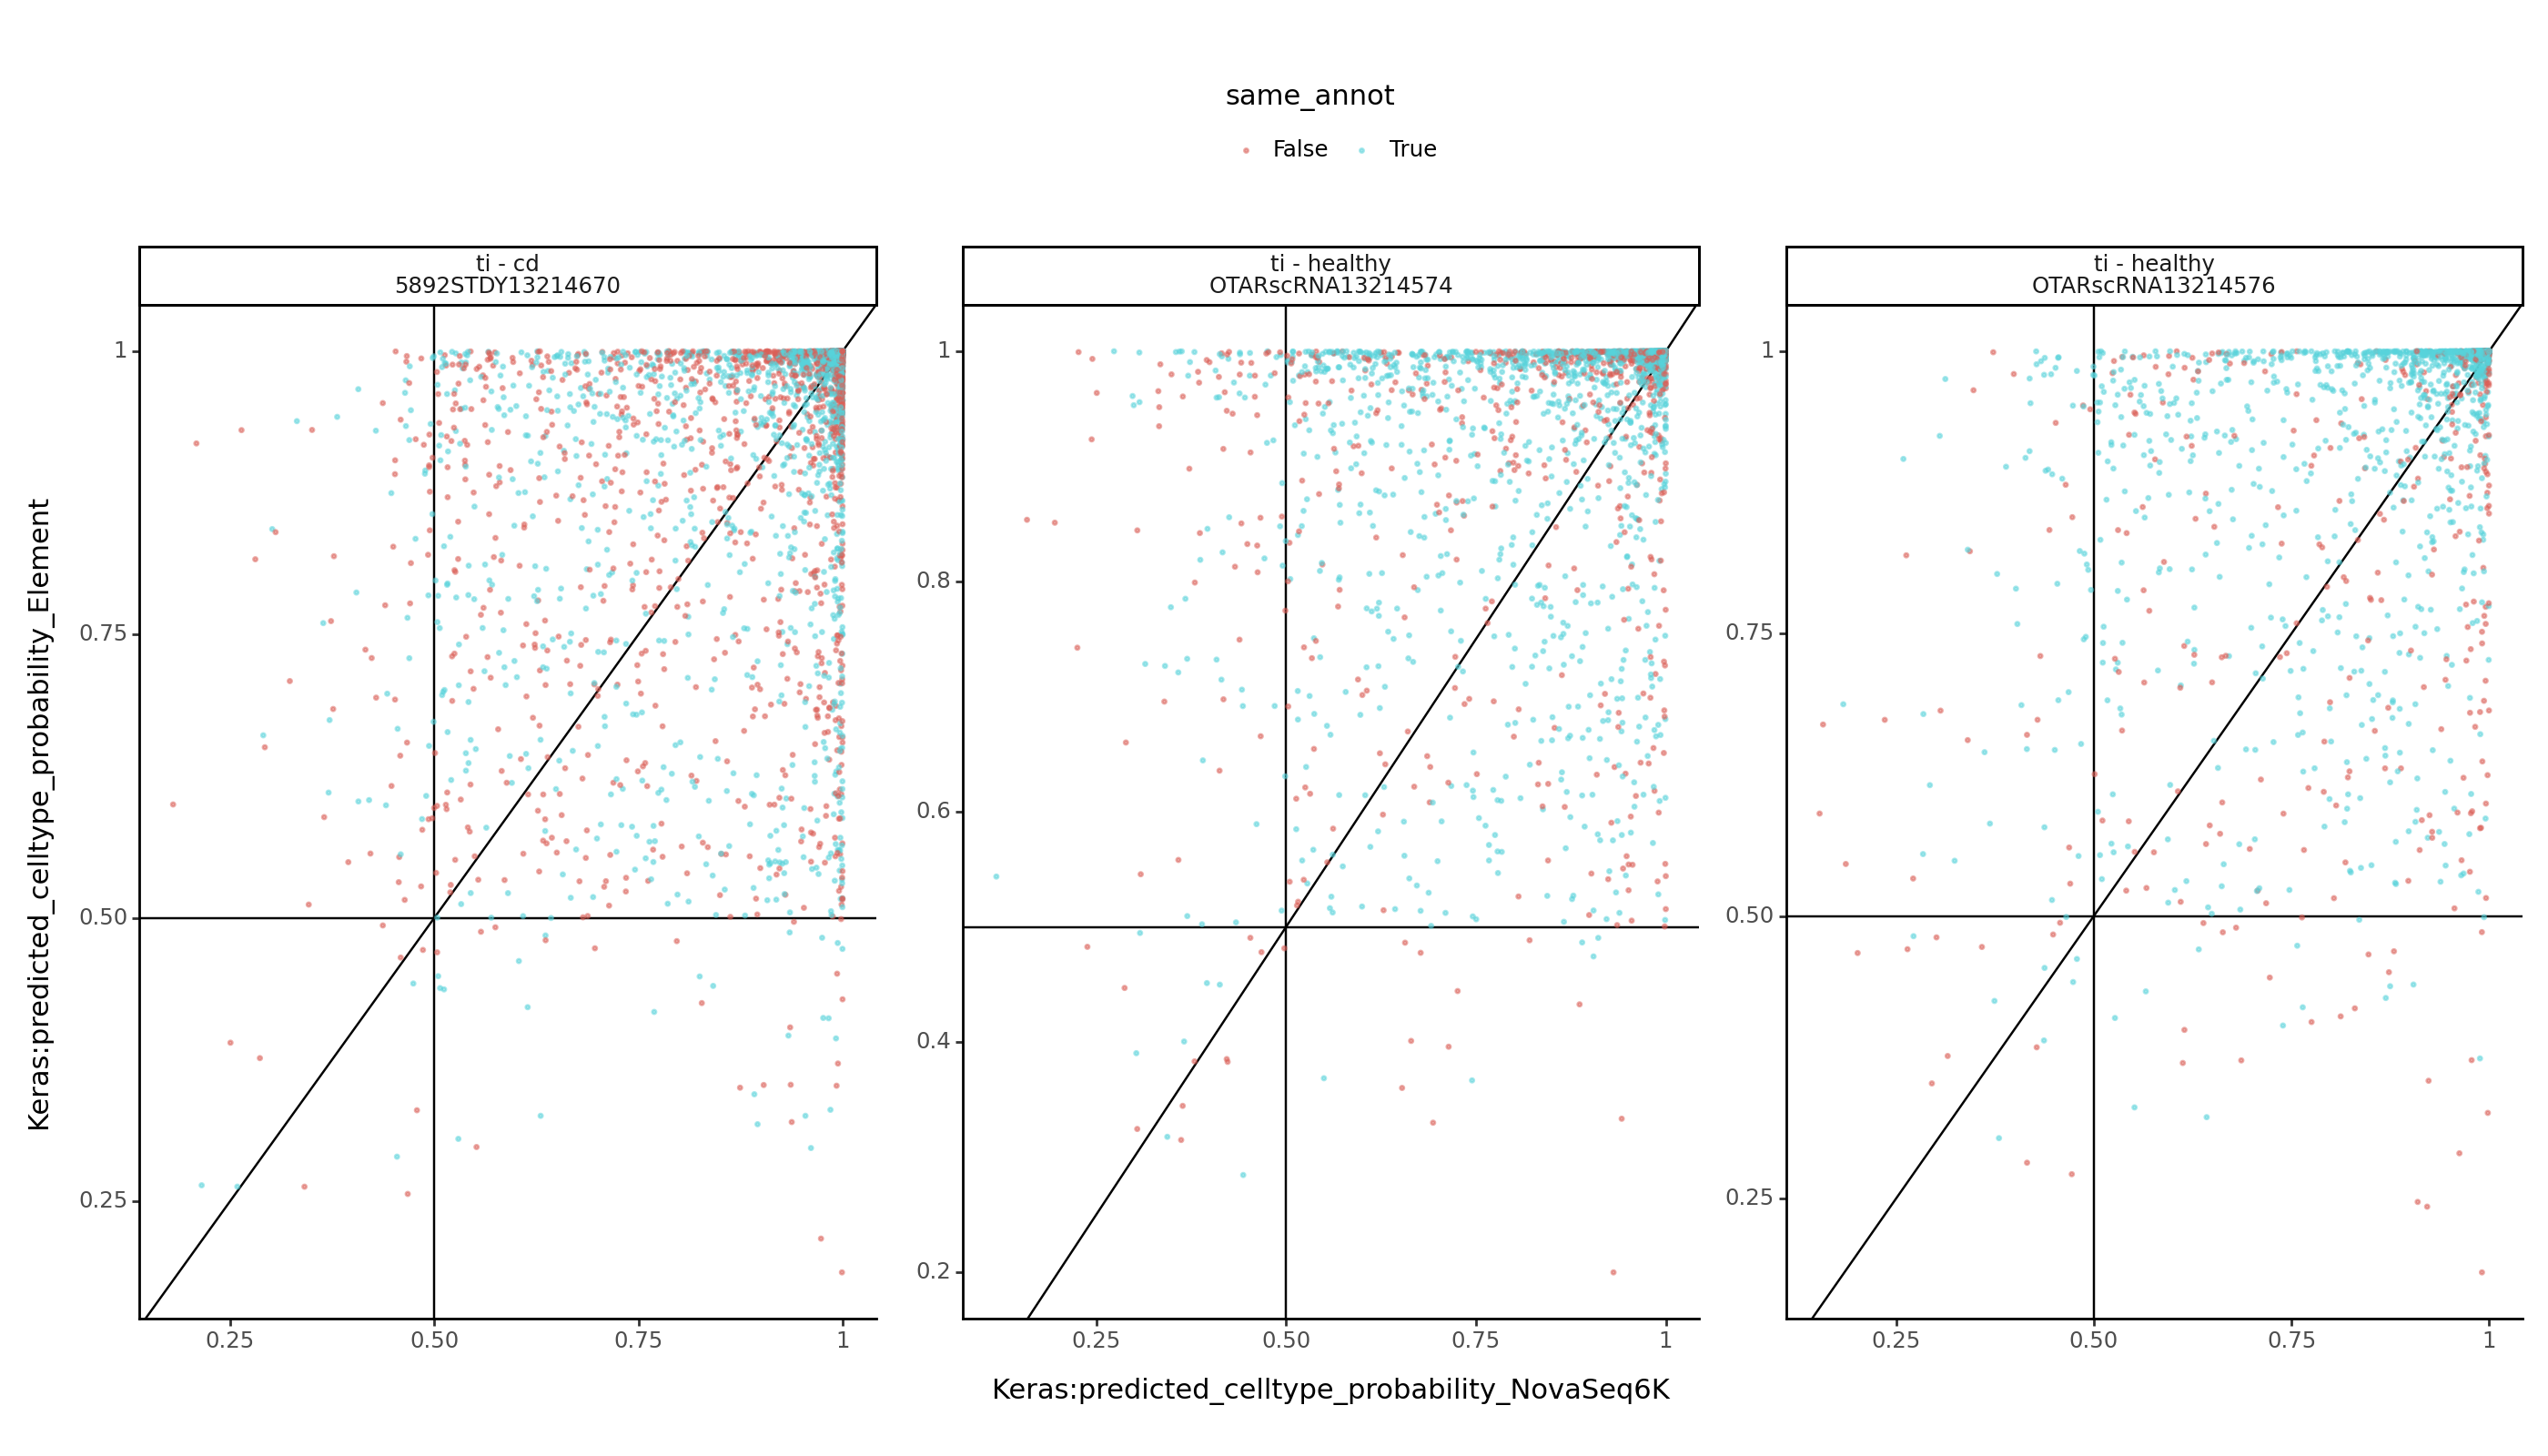

<Figure Size: (1400 x 800)>

In [ ]:
df = adata.obs.loc[adata.obs.biopsy_type != 'blood', ['tissue_disease_sample', 'tech', 'cellID', 'category', 'Keras:predicted_celltype_probability' ]].pivot(index = ['cellID', 'tissue_disease_sample'], columns = 'tech')
df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]
df = df.reset_index()
df.loc[:,'same_annot'] = df['category_NovaSeq6K'] == df['category_Element']
df.same_annot = df.same_annot.astype('str')
(
    ggplot(df, aes(x = 'Keras:predicted_celltype_probability_NovaSeq6K', y = 'Keras:predicted_celltype_probability_Element', 
                          color = 'same_annot')) +
    geom_abline(color = 'black') +
    geom_hline(yintercept = 0.5) + 
    geom_vline(xintercept = 0.5) + 
    geom_point( size = 0.4, alpha = 0.5) +
    theme_classic() +
    facet_wrap('~ tissue_disease_sample', scales = 'free', ncol = 4) +
    theme(figure_size=(14,8), legend_position = 'top')
)